In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

## Helpers

In [2]:
def clean(matrix, tol=1e-10):
    arr = matrix.copy()

    # Flush small elements to zero
    arr[np.abs(arr) < tol] = 0

    # Coalesce similar elements
    if arr.size > 1:
        amfl = np.abs(arr.flat)
        amix = np.argsort(amfl)

        i, ix = 0, amix[0]
        for j, jx in enumerate(amix[1:], start=1):
            if amfl[jx] - amfl[ix] >= tol:
                if j - i > 1:
                    amfl[amix[i:j]] = np.median(amfl[amix[i:j]])
                i, ix = j, jx

        if i != j:
            amfl[amix[i:]] = np.median(amfl[amix[i:]])

        # Fix up the signs and assign
        arr.flat = np.copysign(amfl, arr.flat)

    return arr

In [3]:
MAT_DIR = "./../../example_mats_med"

matrices = {
    "quad" : {},
    "hex"  : {},
    "tet"  : {},
    "tri"  : {}
}

In [4]:
for d in os.walk(MAT_DIR):
    # mat file names
    for m in d[2]:
        mat_data = np.loadtxt(os.path.join(d[0], m))
        mat_data = clean(mat_data)
        # order of prolem and sub type
        mat_name = d[0].split("/")[-2] + "-" + d[0].split("/")[-1]
        # add size
        mat_name += "-" + m.split(".")[0]

        # store in correct location according to type
        for k in matrices.keys():
            if k in d[0]:
                matrices[k][mat_name] = mat_data

## Quad

## see ratios

In [5]:
from collections import defaultdict
ratios = defaultdict(int)
for name, data in matrices["quad"].items():
    dims = data.shape
    ratios[dims[0]/dims[1]] += 1

In [6]:
ratios

defaultdict(int,
            {0.5: 12,
             1.0: 5,
             2.0: 14,
             1.5: 4,
             1.3333333333333333: 2,
             0.75: 2,
             2.5: 2,
             0.8: 2,
             1.25: 2,
             3.5: 2,
             0.5714285714285714: 2,
             1.75: 2,
             3.0: 2,
             0.6666666666666666: 2})

## heatmaps

In [7]:
import seaborn as sns

p1-gauss-legendre-m132
ratio: 0.5
(array([-0.8660254,  0.       ,  0.8660254]), array([ 8, 16,  8]))


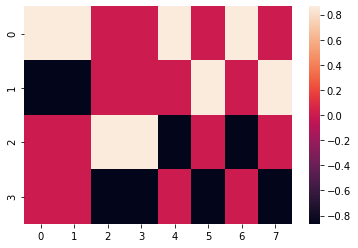

p1-gauss-legendre-m3
ratio: 0.5
(array([-0.3660254,  0.       ,  1.3660254]), array([ 8, 16,  8]))


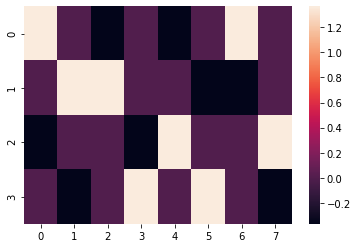

p3-gauss-legendre-m132
ratio: 0.5
(array([-3.33200024, -2.59241098, -1.47067023, -1.42024047, -1.12482651,
       -0.61623104, -0.58062817, -0.38441439,  0.        ,  0.38441439,
        0.58062817,  0.61623104,  1.12482651,  1.42024047,  1.47067023,
        2.59241098,  3.33200024]), array([  8,   8,   8,   8,   8,   8,   8,   8, 384,   8,   8,   8,   8,
         8,   8,   8,   8]))


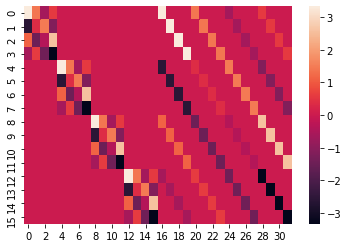

p3-gauss-legendre-lobatto-m132
ratio: 0.5
(array([-5.        , -4.04508497, -2.5       , -1.70344419, -1.54508497,
       -1.20344419, -1.11803399,  0.        ,  1.11803399,  1.20344419,
        1.54508497,  1.70344419,  2.5       ,  4.04508497,  5.        ]), array([  8,   8,   8,   8,   8,   8,   8, 400,   8,   8,   8,   8,   8,
         8,   8]))


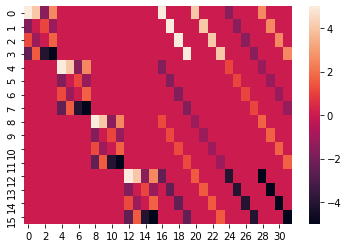

p2-gauss-legendre-m132
ratio: 0.5
(array([-1.93649167, -1.61374306, -1.03279556, -0.64549722,  0.        ,
        0.64549722,  1.03279556,  1.61374306,  1.93649167]), array([  6,   6,   6,   6, 114,   6,   6,   6,   6]))


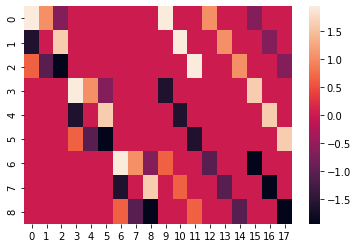

p2-gauss-legendre-lobatto-m132
ratio: 0.5
(array([-3.  , -2.  , -1.25,  0.  ,  1.25,  2.  ,  3.  ]), array([  6,  12,   6, 114,   6,  12,   6]))


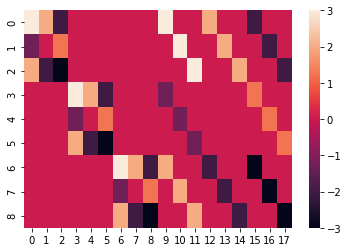

p4-gauss-legendre-m132
ratio: 0.5
(array([-5.0670406 , -3.81255789, -2.02152894, -1.93986454, -1.70607503,
       -1.68402696, -0.97042088, -0.92855803, -0.75835322, -0.72313963,
       -0.55176685, -0.49375908,  0.        ,  0.49375908,  0.55176685,
        0.72313963,  0.75835322,  0.92855803,  0.97042088,  1.68402696,
        1.70607503,  1.93986454,  2.02152894,  3.81255789,  5.0670406 ]), array([  10,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10, 1010,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10,   10,   10]))


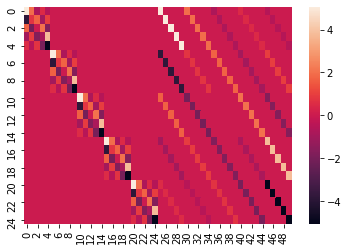

p4-gauss-legendre-lobatto-m132
ratio: 0.5
(array([-7.5       , -6.75650249, -3.        , -2.66666667, -2.31241882,
       -1.74574312, -1.41016418, -1.33658458, -1.33043832, -1.3125    ,
       -0.76376262,  0.        ,  0.76376262,  1.3125    ,  1.33043832,
        1.33658458,  1.41016418,  1.74574312,  2.31241882,  2.66666667,
        3.        ,  6.75650249,  7.5       ]), array([  10,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
       1030,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10]))


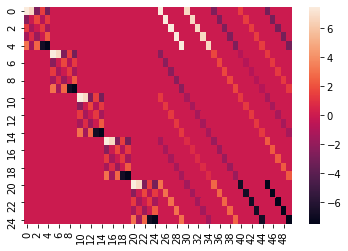

p6-gauss-legendre-m132
ratio: 0.5
(array([-9.56818234, -6.98244017, -3.47320931, -3.3238044 , -3.11057141,
       -2.57685029, -2.5550682 , -2.3560803 , -1.86201883, -1.64736568,
       -1.6443125 , -1.24717059, -1.23199698, -1.10600426, -1.08928106,
       -1.01615121, -0.85730425, -0.74753216, -0.67428047, -0.59619008,
       -0.52681049, -0.48587352, -0.43674268, -0.40809682,  0.        ,
        0.40809682,  0.43674268,  0.48587352,  0.52681049,  0.59619008,
        0.67428047,  0.74753216,  0.85730425,  1.01615121,  1.08928106,
        1.10600426,  1.23199698,  1.24717059,  1.6443125 ,  1.64736568,
        1.86201883,  2.3560803 ,  2.5550682 ,  2.57685029,  3.11057141,
        3.3238044 ,  3.47320931,  6.98244017,  9.56818234]), array([  14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14, 4130,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14, 

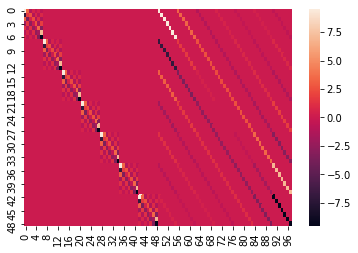

p6-gauss-legendre-lobatto-m132
ratio: 0.5
(array([-14.2015766 , -14.        ,  -5.66898523,  -4.        ,
        -3.89455263,  -3.45582821,  -3.2       ,  -2.26669809,
        -2.21580428,  -2.04996481,  -2.00696924,  -1.78762708,
        -1.67823848,  -1.59860669,  -1.40625   ,  -1.38846981,
        -1.31737344,  -1.0664419 ,  -0.9613398 ,  -0.90754447,
        -0.61639084,  -0.60224718,   0.        ,   0.60224718,
         0.61639084,   0.90754447,   0.9613398 ,   1.0664419 ,
         1.31737344,   1.38846981,   1.40625   ,   1.59860669,
         1.67823848,   1.78762708,   2.00696924,   2.04996481,
         2.21580428,   2.26669809,   3.2       ,   3.45582821,
         3.89455263,   4.        ,   5.66898523,  14.        ,
        14.2015766 ]), array([  14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
       4186,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   1

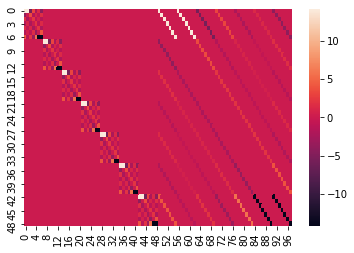

p5-gauss-legendre-m132
ratio: 0.5
(array([-7.14532713, -5.27576253, -2.68967445, -2.57598208, -2.3443613 ,
       -2.09538893, -2.08190754, -1.38899458, -1.2631629 , -1.17485228,
       -0.97773482, -0.89798768, -0.88602069, -0.75619011, -0.53621056,
       -0.52495233, -0.43845798, -0.25302628,  0.        ,  0.25302628,
        0.43845798,  0.52495233,  0.53621056,  0.75619011,  0.88602069,
        0.89798768,  0.97773482,  1.17485228,  1.2631629 ,  1.38899458,
        2.08190754,  2.09538893,  2.3443613 ,  2.57598208,  2.68967445,
        5.27576253,  7.14532713]), array([  12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12, 2160,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12]))


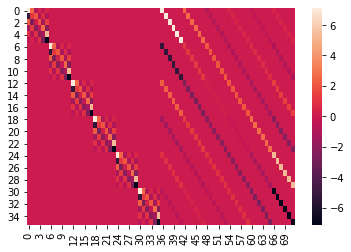

p5-gauss-legendre-lobatto-m132
ratio: 0.5
(array([-10.5       , -10.14141594,  -4.03618727,  -3.5       ,
        -3.04545575,  -2.52342678,  -2.24468465,  -1.75296197,
        -1.72125695,  -1.52483422,  -1.49687198,  -1.34991331,
        -1.30958379,  -1.15282816,  -0.78635667,  -0.65354751,
         0.        ,   0.65354751,   0.78635667,   1.15282816,
         1.30958379,   1.34991331,   1.49687198,   1.52483422,
         1.72125695,   1.75296197,   2.24468465,   2.52342678,
         3.04545575,   3.5       ,   4.03618727,  10.14141594,
        10.5       ]), array([  12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12, 2208,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12]))


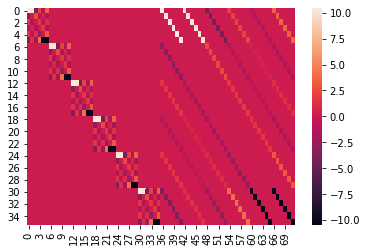

In [9]:
for name, data in matrices["quad"].items():
    dims = data.shape
    
    if dims[0]/dims[1] == 0.5:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

p1-gauss-legendre-m0
ratio: 2.0
(array([-0.3660254,  0.       ,  1.3660254]), array([ 8, 16,  8]))


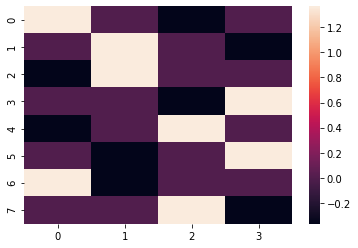

p1-gauss-legendre-m460
ratio: 2.0
(array([-0.8660254,  0.       ,  0.8660254]), array([ 8, 16,  8]))


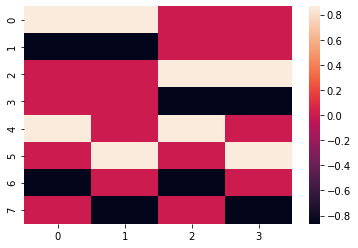

p3-gauss-legendre-m6
ratio: 2.0
(array([-4.38915297, -1.24762477, -0.6145281 , -0.32748486,  0.        ,
        0.32748486,  0.6145281 ,  1.24762477,  4.38915297]), array([  8,   8,   8,   8, 448,   8,   8,   8,   8]))


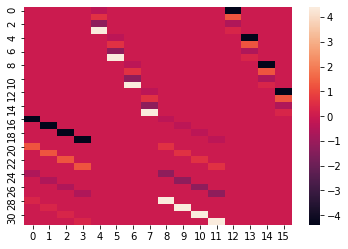

p3-gauss-legendre-m460
ratio: 2.0
(array([-3.33200024, -2.59241098, -1.47067023, -1.42024047, -1.12482651,
       -0.61623104, -0.58062817, -0.38441439,  0.        ,  0.38441439,
        0.58062817,  0.61623104,  1.12482651,  1.42024047,  1.47067023,
        2.59241098,  3.33200024]), array([  8,   8,   8,   8,   8,   8,   8,   8, 384,   8,   8,   8,   8,
         8,   8,   8,   8]))


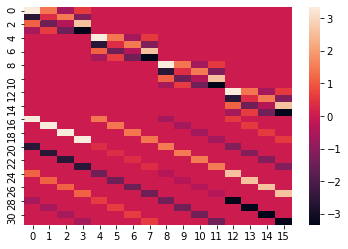

p3-gauss-legendre-lobatto-m6
ratio: 2.0
(array([-8.        , -2.        , -0.89442719,  0.        ,  0.89442719,
        2.        ,  8.        ]), array([  8,   8,  16, 448,  16,   8,   8]))


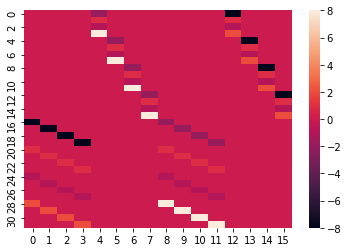

p3-gauss-legendre-lobatto-m460
ratio: 2.0
(array([-5.        , -4.04508497, -2.5       , -1.70344419, -1.54508497,
       -1.20344419, -1.11803399,  0.        ,  1.11803399,  1.20344419,
        1.54508497,  1.70344419,  2.5       ,  4.04508497,  5.        ]), array([  8,   8,   8,   8,   8,   8,   8, 400,   8,   8,   8,   8,   8,
         8,   8]))


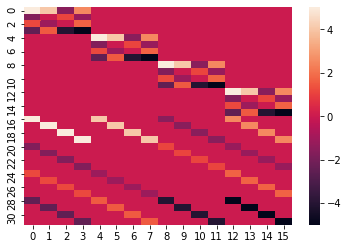

p2-gauss-legendre-m460
ratio: 2.0
(array([-1.93649167, -1.61374306, -1.03279556, -0.64549722,  0.        ,
        0.64549722,  1.03279556,  1.61374306,  1.93649167]), array([  6,   6,   6,   6, 114,   6,   6,   6,   6]))


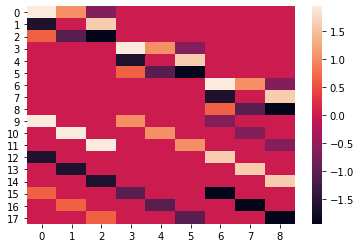

p2-gauss-legendre-lobatto-m460
ratio: 2.0
(array([-3.  , -2.  , -1.25,  0.  ,  1.25,  2.  ,  3.  ]), array([  6,  12,   6, 114,   6,  12,   6]))


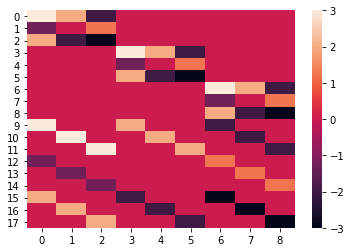

p4-gauss-legendre-m460
ratio: 2.0
(array([-5.0670406 , -3.81255789, -2.02152894, -1.93986454, -1.70607503,
       -1.68402696, -0.97042088, -0.92855803, -0.75835322, -0.72313963,
       -0.55176685, -0.49375908,  0.        ,  0.49375908,  0.55176685,
        0.72313963,  0.75835322,  0.92855803,  0.97042088,  1.68402696,
        1.70607503,  1.93986454,  2.02152894,  3.81255789,  5.0670406 ]), array([  10,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10, 1010,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10,   10,   10]))


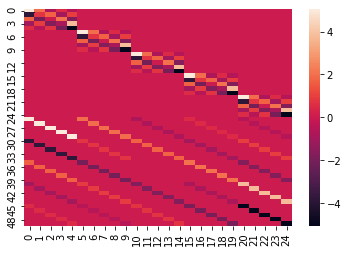

p4-gauss-legendre-lobatto-m460
ratio: 2.0
(array([-7.5       , -6.75650249, -3.        , -2.66666667, -2.31241882,
       -1.74574312, -1.41016418, -1.33658458, -1.33043832, -1.3125    ,
       -0.76376262,  0.        ,  0.76376262,  1.3125    ,  1.33043832,
        1.33658458,  1.41016418,  1.74574312,  2.31241882,  2.66666667,
        3.        ,  6.75650249,  7.5       ]), array([  10,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
       1030,   10,   10,   10,   10,   10,   10,   10,   10,   10,   10,
         10]))


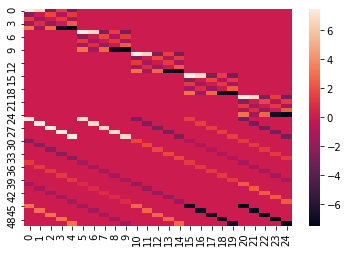

p6-gauss-legendre-m460
ratio: 2.0
(array([-9.56818234, -6.98244017, -3.47320931, -3.3238044 , -3.11057141,
       -2.57685029, -2.5550682 , -2.3560803 , -1.86201883, -1.64736568,
       -1.6443125 , -1.24717059, -1.23199698, -1.10600426, -1.08928106,
       -1.01615121, -0.85730425, -0.74753216, -0.67428047, -0.59619008,
       -0.52681049, -0.48587352, -0.43674268, -0.40809682,  0.        ,
        0.40809682,  0.43674268,  0.48587352,  0.52681049,  0.59619008,
        0.67428047,  0.74753216,  0.85730425,  1.01615121,  1.08928106,
        1.10600426,  1.23199698,  1.24717059,  1.6443125 ,  1.64736568,
        1.86201883,  2.3560803 ,  2.5550682 ,  2.57685029,  3.11057141,
        3.3238044 ,  3.47320931,  6.98244017,  9.56818234]), array([  14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14, 4130,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14, 

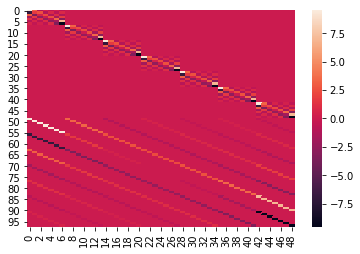

p6-gauss-legendre-lobatto-m460
ratio: 2.0
(array([-14.2015766 , -14.        ,  -5.66898523,  -4.        ,
        -3.89455263,  -3.45582821,  -3.2       ,  -2.26669809,
        -2.21580428,  -2.04996481,  -2.00696924,  -1.78762708,
        -1.67823848,  -1.59860669,  -1.40625   ,  -1.38846981,
        -1.31737344,  -1.0664419 ,  -0.9613398 ,  -0.90754447,
        -0.61639084,  -0.60224718,   0.        ,   0.60224718,
         0.61639084,   0.90754447,   0.9613398 ,   1.0664419 ,
         1.31737344,   1.38846981,   1.40625   ,   1.59860669,
         1.67823848,   1.78762708,   2.00696924,   2.04996481,
         2.21580428,   2.26669809,   3.2       ,   3.45582821,
         3.89455263,   4.        ,   5.66898523,  14.        ,
        14.2015766 ]), array([  14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
       4186,   14,   14,   14,   14,   14,   14,   14,   14,   14,   14,
         14,   14,   1

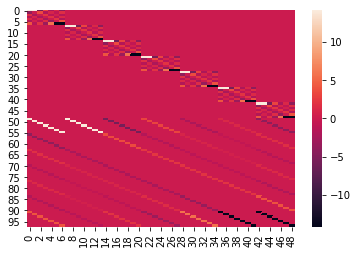

p5-gauss-legendre-m460
ratio: 2.0
(array([-7.14532713, -5.27576253, -2.68967445, -2.57598208, -2.3443613 ,
       -2.09538893, -2.08190754, -1.38899458, -1.2631629 , -1.17485228,
       -0.97773482, -0.89798768, -0.88602069, -0.75619011, -0.53621056,
       -0.52495233, -0.43845798, -0.25302628,  0.        ,  0.25302628,
        0.43845798,  0.52495233,  0.53621056,  0.75619011,  0.88602069,
        0.89798768,  0.97773482,  1.17485228,  1.2631629 ,  1.38899458,
        2.08190754,  2.09538893,  2.3443613 ,  2.57598208,  2.68967445,
        5.27576253,  7.14532713]), array([  12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12, 2160,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12]))


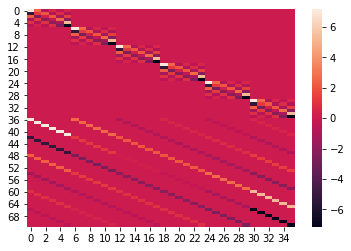

p5-gauss-legendre-lobatto-m460
ratio: 2.0
(array([-10.5       , -10.14141594,  -4.03618727,  -3.5       ,
        -3.04545575,  -2.52342678,  -2.24468465,  -1.75296197,
        -1.72125695,  -1.52483422,  -1.49687198,  -1.34991331,
        -1.30958379,  -1.15282816,  -0.78635667,  -0.65354751,
         0.        ,   0.65354751,   0.78635667,   1.15282816,
         1.30958379,   1.34991331,   1.49687198,   1.52483422,
         1.72125695,   1.75296197,   2.24468465,   2.52342678,
         3.04545575,   3.5       ,   4.03618727,  10.14141594,
        10.5       ]), array([  12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12, 2208,   12,   12,   12,   12,   12,
         12,   12,   12,   12,   12,   12,   12,   12,   12,   12,   12]))


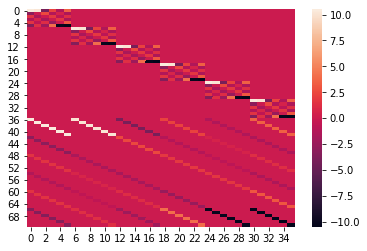

In [10]:
for name, data in matrices["quad"].items():
    dims = data.shape
    
    if dims[0]/dims[1] == 2.0:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

p1-gauss-legendre-m6
ratio: 1.0
(array([-1.3660254, -0.3660254,  0.       ,  0.3660254,  1.3660254]), array([ 4,  4, 48,  4,  4]))


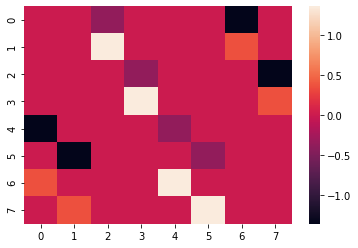

p3-gauss-legendre-m0
ratio: 1.0
(array([-0.81363245, -0.1139172 ,  0.        ,  0.40076152,  1.52678813]), array([ 16,  16, 192,  16,  16]))


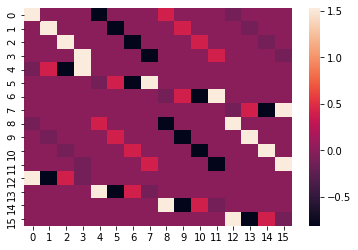

p3-gauss-legendre-m3
ratio: 1.0
(array([-1.24762477, -0.32748486,  0.        ,  0.6145281 ,  4.38915297]), array([ 16,  16, 192,  16,  16]))


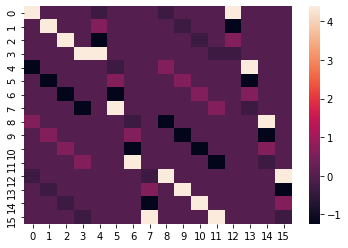

p3-gauss-legendre-lobatto-m0
ratio: 1.0
(array([0., 1.]), array([240,  16]))


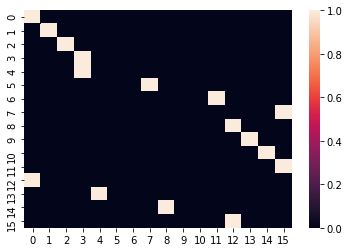

p3-gauss-legendre-lobatto-m3
ratio: 1.0
(array([-2.        , -0.89442719,  0.        ,  0.89442719,  8.        ]), array([ 16,  16, 192,  16,  16]))


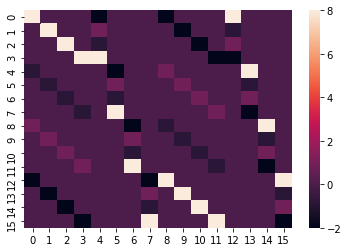

p2-gauss-legendre-m6
ratio: 1.5
(array([-2.661895, -0.75    , -0.338105,  0.      ,  0.338105,  0.75    ,
        2.661895]), array([  6,   6,   6, 180,   6,   6,   6]))


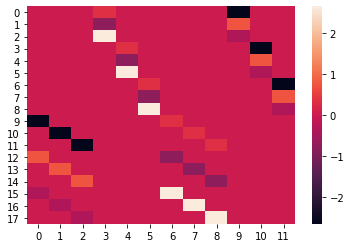

p2-gauss-legendre-m0
ratio: 1.3333333333333333
(array([-0.66666667,  0.        ,  0.18783611,  1.47883056]), array([12, 72, 12, 12]))


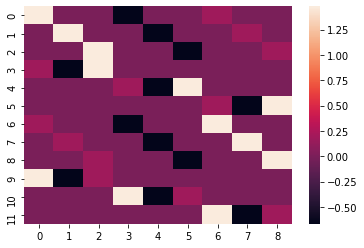

p2-gauss-legendre-m3
ratio: 0.75
(array([-0.75    ,  0.      ,  0.338105,  2.661895]), array([12, 72, 12, 12]))


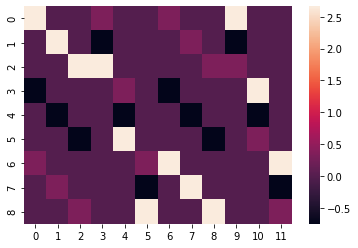

p2-gauss-legendre-lobatto-m6
ratio: 1.5
(array([-4.5 , -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  4.5 ]), array([  6,   6,   6, 180,   6,   6,   6]))


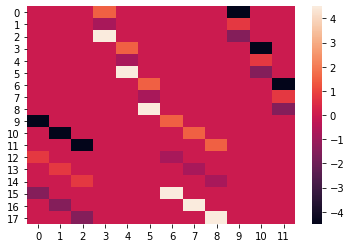

p2-gauss-legendre-lobatto-m0
ratio: 1.3333333333333333
(array([0., 1.]), array([96, 12]))


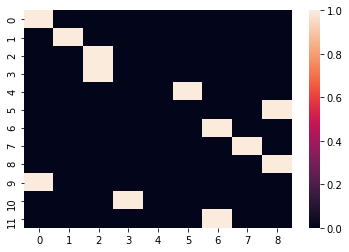

p2-gauss-legendre-lobatto-m3
ratio: 0.75
(array([-0.75,  0.  ,  1.5 ,  4.5 ]), array([12, 72, 12, 12]))


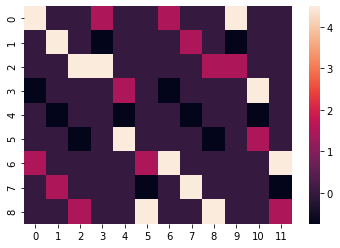

p4-gauss-legendre-m6
ratio: 2.5
(array([-6.54804561, -1.86607792, -0.9375    , -0.55981112, -0.32228787,
        0.        ,  0.32228787,  0.55981112,  0.9375    ,  1.86607792,
        6.54804561]), array([ 10,  10,  10,  10,  10, 900,  10,  10,  10,  10,  10]))


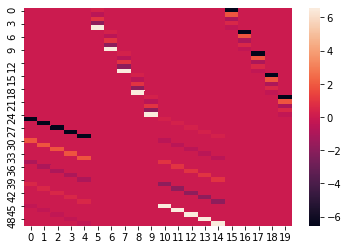

p4-gauss-legendre-m0
ratio: 0.8
(array([-0.89315839, -0.26794165,  0.        ,  0.07635866,  0.53333333,
        1.55140805]), array([ 20,  20, 400,  20,  20,  20]))


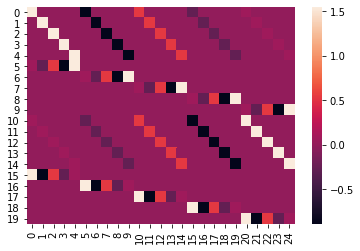

p4-gauss-legendre-m3
ratio: 1.25
(array([-1.86607792, -0.55981112,  0.        ,  0.32228787,  0.9375    ,
        6.54804561]), array([ 20,  20, 400,  20,  20,  20]))


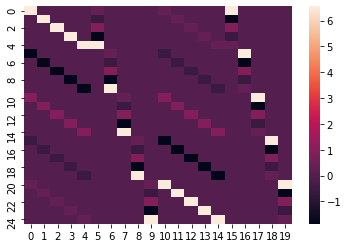

p4-gauss-legendre-lobatto-m6
ratio: 2.5
(array([-12.5       ,  -2.5       ,  -1.07142857,  -0.9375    ,
         0.        ,   0.9375    ,   1.07142857,   2.5       ,
        12.5       ]), array([ 10,  10,  20,  10, 900,  10,  20,  10,  10]))


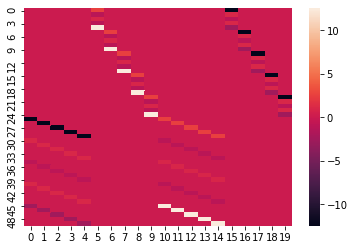

p4-gauss-legendre-lobatto-m0
ratio: 0.8
(array([0., 1.]), array([480,  20]))


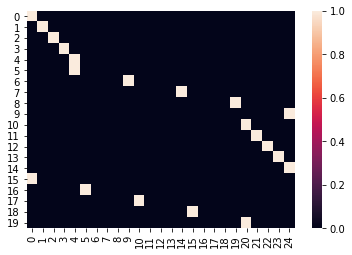

p4-gauss-legendre-lobatto-m3
ratio: 1.25
(array([-1.07142857,  0.        ,  0.9375    ,  2.5       , 12.5       ]), array([ 40, 400,  20,  20,  20]))


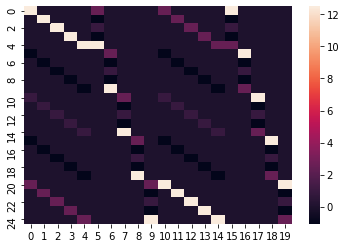

p6-gauss-legendre-m6
ratio: 3.5
(array([-12.16096777,  -3.47053266,  -1.76022778,  -1.09375   ,
        -0.74392821,  -0.51507804,  -0.31752836,   0.        ,
         0.31752836,   0.51507804,   0.74392821,   1.09375   ,
         1.76022778,   3.47053266,  12.16096777]), array([  14,   14,   14,   14,   14,   14,   14, 2548,   14,   14,   14,
         14,   14,   14,   14]))


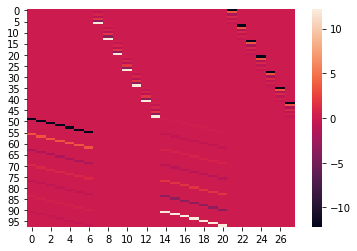

p6-gauss-legendre-m0
ratio: 0.5714285714285714
(array([-0.9707267 , -0.45714286, -0.1440701 ,  0.        ,  0.04111515,
        0.28405415,  0.67210786,  1.5746625 ]), array([  28,   28,   28, 1176,   28,   28,   28,   28]))


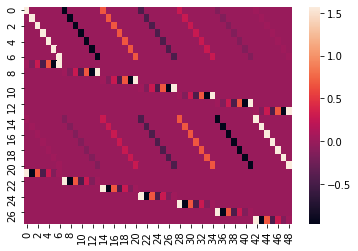

p6-gauss-legendre-m3
ratio: 1.75
(array([-3.47053266, -1.09375   , -0.51507804,  0.        ,  0.31752836,
        0.74392821,  1.76022778, 12.16096777]), array([  28,   28,   28, 1176,   28,   28,   28,   28]))


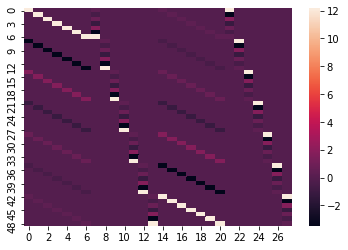

p6-gauss-legendre-lobatto-m6
ratio: 3.5
(array([-24.5       ,  -3.5       ,  -1.45162661,  -1.16237041,
        -1.09375   ,   0.        ,   1.09375   ,   1.16237041,
         1.45162661,   3.5       ,  24.5       ]), array([  14,   14,   28,   28,   14, 2548,   14,   28,   28,   14,   14]))


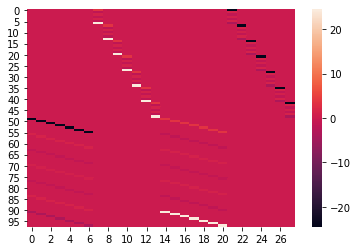

p6-gauss-legendre-lobatto-m0
ratio: 0.5714285714285714
(array([0., 1.]), array([1344,   28]))


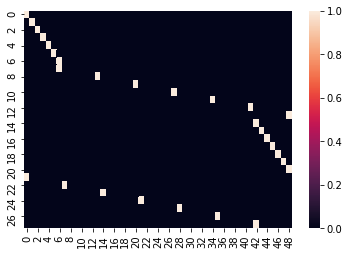

p6-gauss-legendre-lobatto-m3
ratio: 1.75
(array([-1.45162661, -1.09375   ,  0.        ,  1.16237041,  3.5       ,
       24.5       ]), array([  56,   28, 1176,   56,   28,   28]))


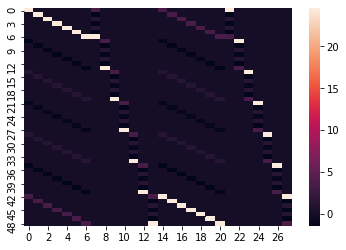

p5-gauss-legendre-m6
ratio: 3.0
(array([-9.13864199, -2.60688198, -1.31846908, -0.81046465, -0.53165311,
       -0.31935145,  0.        ,  0.31935145,  0.53165311,  0.81046465,
        1.31846908,  2.60688198,  9.13864199]), array([  12,   12,   12,   12,   12,   12, 1584,   12,   12,   12,   12,
         12,   12]))


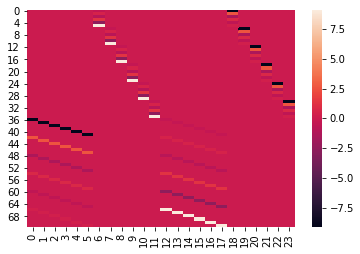

p5-gauss-legendre-m0
ratio: 0.6666666666666666
(array([-0.94046284, -0.3792277 , -0.05471272,  0.        ,  0.19180001,
        0.61693006,  1.5656732 ]), array([ 24,  24,  24, 720,  24,  24,  24]))


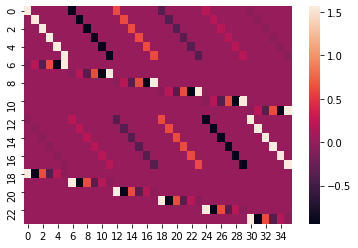

p5-gauss-legendre-m3
ratio: 1.5
(array([-2.60688198, -0.81046465, -0.31935145,  0.        ,  0.53165311,
        1.31846908,  9.13864199]), array([ 24,  24,  24, 720,  24,  24,  24]))


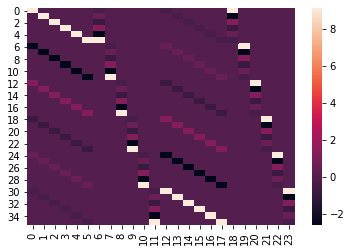

p5-gauss-legendre-lobatto-m6
ratio: 3.0
(array([-18.        ,  -3.        ,  -1.2590908 ,  -1.03988318,
         0.        ,   1.03988318,   1.2590908 ,   3.        ,
        18.        ]), array([  12,   12,   24,   24, 1584,   24,   24,   12,   12]))


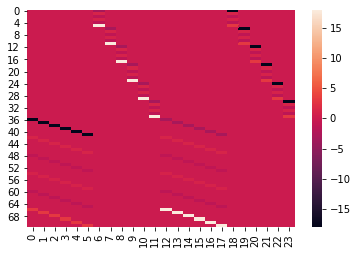

p5-gauss-legendre-lobatto-m0
ratio: 0.6666666666666666
(array([0., 1.]), array([840,  24]))


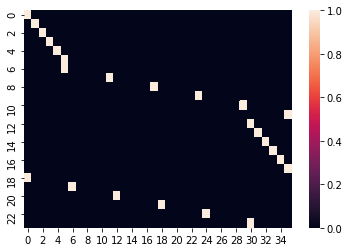

p5-gauss-legendre-lobatto-m3
ratio: 1.5
(array([-3.        , -1.2590908 , -1.03988318,  0.        ,  1.03988318,
        1.2590908 , 18.        ]), array([ 24,  24,  24, 720,  24,  24,  24]))


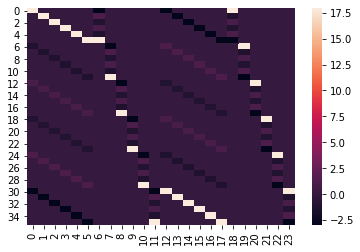

In [11]:
for name, data in matrices["quad"].items():
    dims = data.shape
    
    if dims[0]/dims[1] != 2.0 and dims[0]/dims[1] != 0.5:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

### thoughts
- m132 and m460 have distinct dim ratio and pattern

- vary diag

## Hex

In [12]:
from collections import defaultdict
ratios_hex = defaultdict(int)
for name, data in matrices["hex"].items():
    dims = data.shape
    ratios_hex[dims[0]/dims[1]] += 1

In [13]:
ratios_hex

defaultdict(int,
            {0.3333333333333333: 12,
             1.0: 5,
             3.0: 14,
             2.0: 4,
             1.5: 4,
             0.6666666666666666: 2,
             0.5: 2,
             2.5: 2,
             1.2: 2,
             0.8333333333333334: 2,
             3.5: 2,
             0.8571428571428571: 2,
             1.1666666666666667: 2})

p1-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-0.8660254,  0.       ,  0.8660254]), array([ 24, 144,  24]))


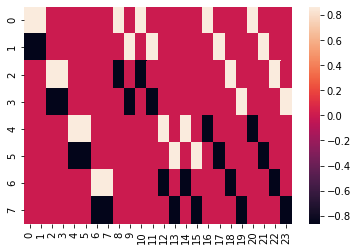

p1-gauss-legendre-m3
ratio: 0.3333333333333333
(array([-0.3660254,  0.       ,  1.3660254]), array([ 24, 144,  24]))


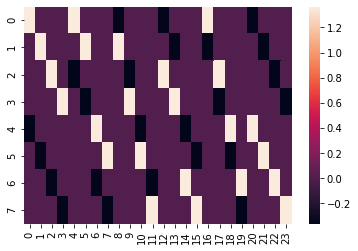

p3-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-3.33200024, -2.59241098, -1.47067023, -1.42024047, -1.12482651,
       -0.61623104, -0.58062817, -0.38441439,  0.        ,  0.38441439,
        0.58062817,  0.61623104,  1.12482651,  1.42024047,  1.47067023,
        2.59241098,  3.33200024]), array([   48,    48,    48,    48,    48,    48,    48,    48, 11520,
          48,    48,    48,    48,    48,    48,    48,    48]))


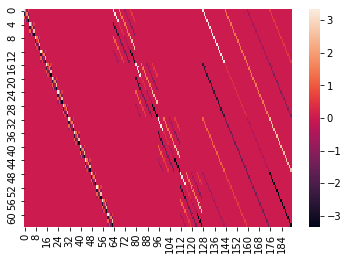

p3-gauss-legendre-lobatto-m132
ratio: 0.3333333333333333
(array([-5.        , -4.04508497, -2.5       , -1.70344419, -1.54508497,
       -1.20344419, -1.11803399,  0.        ,  1.11803399,  1.20344419,
        1.54508497,  1.70344419,  2.5       ,  4.04508497,  5.        ]), array([   48,    48,    48,    48,    48,    48,    48, 11616,    48,
          48,    48,    48,    48,    48,    48]))


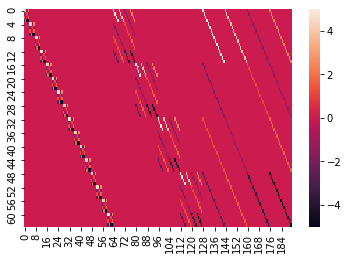

p2-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-1.93649167, -1.61374306, -1.03279556, -0.64549722,  0.        ,
        0.64549722,  1.03279556,  1.61374306,  1.93649167]), array([  27,   27,   27,   27, 1971,   27,   27,   27,   27]))


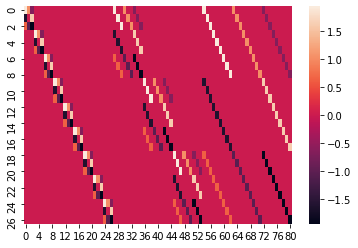

p2-gauss-legendre-lobatto-m132
ratio: 0.3333333333333333
(array([-3.  , -2.  , -1.25,  0.  ,  1.25,  2.  ,  3.  ]), array([  27,   54,   27, 1971,   27,   54,   27]))


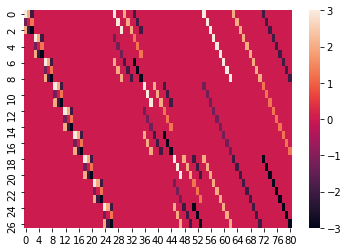

p4-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-5.0670406 , -3.81255789, -2.02152894, -1.93986454, -1.70607503,
       -1.68402696, -0.97042088, -0.92855803, -0.75835322, -0.72313963,
       -0.55176685, -0.49375908,  0.        ,  0.49375908,  0.55176685,
        0.72313963,  0.75835322,  0.92855803,  0.97042088,  1.68402696,
        1.70607503,  1.93986454,  2.02152894,  3.81255789,  5.0670406 ]), array([   75,    75,    75,    75,    75,    75,    75,    75,    75,
          75,    75,    75, 45075,    75,    75,    75,    75,    75,
          75,    75,    75,    75,    75,    75,    75]))


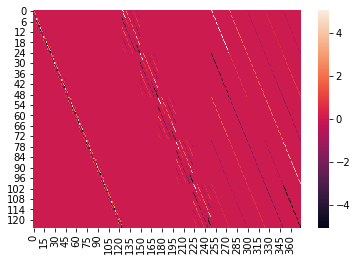

p4-gauss-legendre-lobatto-m132
ratio: 0.3333333333333333
(array([-7.5       , -6.75650249, -3.        , -2.66666667, -2.31241882,
       -1.74574312, -1.41016418, -1.33658458, -1.33043832, -1.3125    ,
       -0.76376262,  0.        ,  0.76376262,  1.3125    ,  1.33043832,
        1.33658458,  1.41016418,  1.74574312,  2.31241882,  2.66666667,
        3.        ,  6.75650249,  7.5       ]), array([   75,    75,    75,    75,    75,    75,    75,    75,    75,
          75,    75, 45225,    75,    75,    75,    75,    75,    75,
          75,    75,    75,    75,    75]))


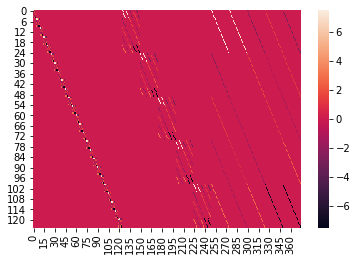

p6-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-9.56818234, -6.98244017, -3.47320931, -3.3238044 , -3.11057141,
       -2.57685029, -2.5550682 , -2.3560803 , -1.86201883, -1.64736568,
       -1.6443125 , -1.24717059, -1.23199698, -1.10600426, -1.08928106,
       -1.01615121, -0.85730425, -0.74753216, -0.67428047, -0.59619008,
       -0.52681049, -0.48587352, -0.43674268, -0.40809682,  0.        ,
        0.40809682,  0.43674268,  0.48587352,  0.52681049,  0.59619008,
        0.67428047,  0.74753216,  0.85730425,  1.01615121,  1.08928106,
        1.10600426,  1.23199698,  1.24717059,  1.6443125 ,  1.64736568,
        1.86201883,  2.3560803 ,  2.5550682 ,  2.57685029,  3.11057141,
        3.3238044 ,  3.47320931,  6.98244017,  9.56818234]), array([   147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
       345891,    147,    14

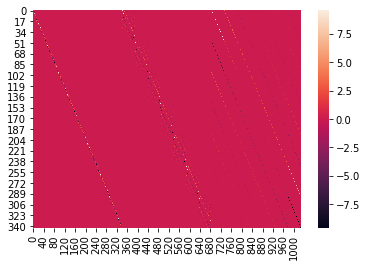

p6-gauss-legendre-lobatto-m132
ratio: 0.3333333333333333
(array([-14.2015766 , -14.        ,  -5.66898523,  -4.        ,
        -3.89455263,  -3.45582821,  -3.2       ,  -2.26669809,
        -2.21580428,  -2.04996481,  -2.00696924,  -1.78762708,
        -1.67823848,  -1.59860669,  -1.40625   ,  -1.38846981,
        -1.31737344,  -1.0664419 ,  -0.9613398 ,  -0.90754447,
        -0.61639084,  -0.60224718,   0.        ,   0.60224718,
         0.61639084,   0.90754447,   0.9613398 ,   1.0664419 ,
         1.31737344,   1.38846981,   1.40625   ,   1.59860669,
         1.67823848,   1.78762708,   2.00696924,   2.04996481,
         2.21580428,   2.26669809,   3.2       ,   3.45582821,
         3.89455263,   4.        ,   5.66898523,  14.        ,
        14.2015766 ]), array([   147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147, 346479,    147,
          147

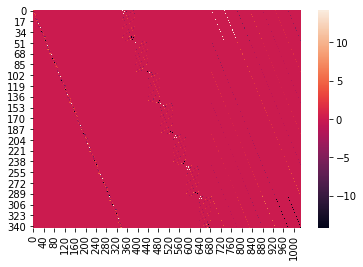

p5-gauss-legendre-m132
ratio: 0.3333333333333333
(array([-7.14532713, -5.27576253, -2.68967445, -2.57598208, -2.3443613 ,
       -2.09538893, -2.08190754, -1.38899458, -1.2631629 , -1.17485228,
       -0.97773482, -0.89798768, -0.88602069, -0.75619011, -0.53621056,
       -0.52495233, -0.43845798, -0.25302628,  0.        ,  0.25302628,
        0.43845798,  0.52495233,  0.53621056,  0.75619011,  0.88602069,
        0.89798768,  0.97773482,  1.17485228,  1.2631629 ,  1.38899458,
        2.08190754,  2.09538893,  2.3443613 ,  2.57598208,  2.68967445,
        5.27576253,  7.14532713]), array([   108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108,    108, 136080,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108]))


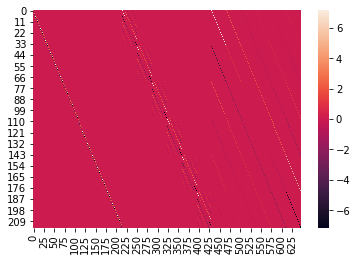

p5-gauss-legendre-lobatto-m132
ratio: 0.3333333333333333
(array([-10.5       , -10.14141594,  -4.03618727,  -3.5       ,
        -3.04545575,  -2.52342678,  -2.24468465,  -1.75296197,
        -1.72125695,  -1.52483422,  -1.49687198,  -1.34991331,
        -1.30958379,  -1.15282816,  -0.78635667,  -0.65354751,
         0.        ,   0.65354751,   0.78635667,   1.15282816,
         1.30958379,   1.34991331,   1.49687198,   1.52483422,
         1.72125695,   1.75296197,   2.24468465,   2.52342678,
         3.04545575,   3.5       ,   4.03618727,  10.14141594,
        10.5       ]), array([   108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
       136512,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108]))


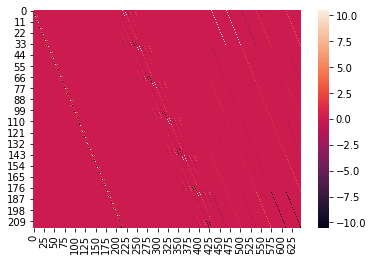

In [14]:
for name, data in matrices["hex"].items():
    dims = data.shape
    
    if dims[0]/dims[1] == 1/3.0:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

p1-gauss-legendre-m0
ratio: 3.0
(array([-0.3660254,  0.       ,  1.3660254]), array([ 24, 144,  24]))


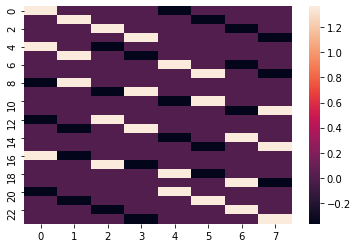

p1-gauss-legendre-m460
ratio: 3.0
(array([-0.8660254,  0.       ,  0.8660254]), array([ 24, 144,  24]))


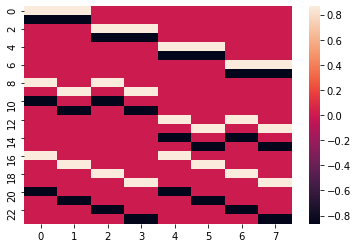

p3-gauss-legendre-m460
ratio: 3.0
(array([-3.33200024, -2.59241098, -1.47067023, -1.42024047, -1.12482651,
       -0.61623104, -0.58062817, -0.38441439,  0.        ,  0.38441439,
        0.58062817,  0.61623104,  1.12482651,  1.42024047,  1.47067023,
        2.59241098,  3.33200024]), array([   48,    48,    48,    48,    48,    48,    48,    48, 11520,
          48,    48,    48,    48,    48,    48,    48,    48]))


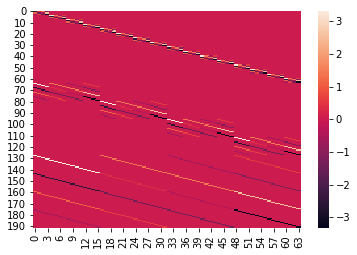

p3-gauss-legendre-lobatto-m460
ratio: 3.0
(array([-5.        , -4.04508497, -2.5       , -1.70344419, -1.54508497,
       -1.20344419, -1.11803399,  0.        ,  1.11803399,  1.20344419,
        1.54508497,  1.70344419,  2.5       ,  4.04508497,  5.        ]), array([   48,    48,    48,    48,    48,    48,    48, 11616,    48,
          48,    48,    48,    48,    48,    48]))


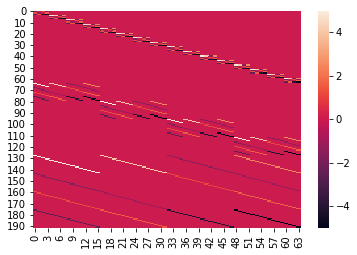

p2-gauss-legendre-m460
ratio: 3.0
(array([-1.93649167, -1.61374306, -1.03279556, -0.64549722,  0.        ,
        0.64549722,  1.03279556,  1.61374306,  1.93649167]), array([  27,   27,   27,   27, 1971,   27,   27,   27,   27]))


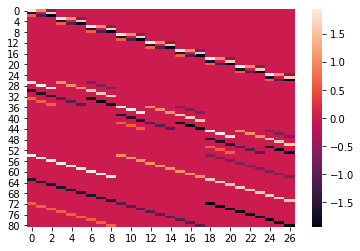

p2-gauss-legendre-lobatto-m460
ratio: 3.0
(array([-3.  , -2.  , -1.25,  0.  ,  1.25,  2.  ,  3.  ]), array([  27,   54,   27, 1971,   27,   54,   27]))


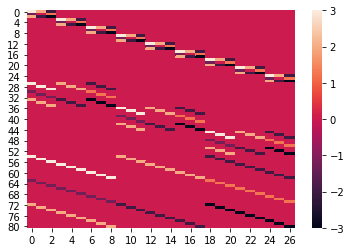

p4-gauss-legendre-m460
ratio: 3.0
(array([-5.0670406 , -3.81255789, -2.02152894, -1.93986454, -1.70607503,
       -1.68402696, -0.97042088, -0.92855803, -0.75835322, -0.72313963,
       -0.55176685, -0.49375908,  0.        ,  0.49375908,  0.55176685,
        0.72313963,  0.75835322,  0.92855803,  0.97042088,  1.68402696,
        1.70607503,  1.93986454,  2.02152894,  3.81255789,  5.0670406 ]), array([   75,    75,    75,    75,    75,    75,    75,    75,    75,
          75,    75,    75, 45075,    75,    75,    75,    75,    75,
          75,    75,    75,    75,    75,    75,    75]))


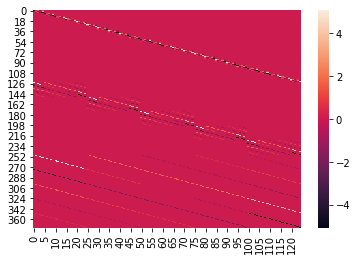

p4-gauss-legendre-lobatto-m460
ratio: 3.0
(array([-7.5       , -6.75650249, -3.        , -2.66666667, -2.31241882,
       -1.74574312, -1.41016418, -1.33658458, -1.33043832, -1.3125    ,
       -0.76376262,  0.        ,  0.76376262,  1.3125    ,  1.33043832,
        1.33658458,  1.41016418,  1.74574312,  2.31241882,  2.66666667,
        3.        ,  6.75650249,  7.5       ]), array([   75,    75,    75,    75,    75,    75,    75,    75,    75,
          75,    75, 45225,    75,    75,    75,    75,    75,    75,
          75,    75,    75,    75,    75]))


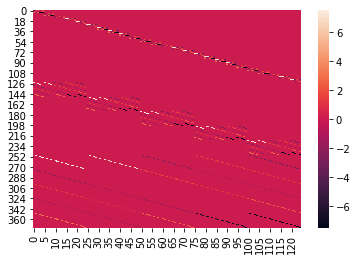

p6-gauss-legendre-m460
ratio: 3.0
(array([-9.56818234, -6.98244017, -3.47320931, -3.3238044 , -3.11057141,
       -2.57685029, -2.5550682 , -2.3560803 , -1.86201883, -1.64736568,
       -1.6443125 , -1.24717059, -1.23199698, -1.10600426, -1.08928106,
       -1.01615121, -0.85730425, -0.74753216, -0.67428047, -0.59619008,
       -0.52681049, -0.48587352, -0.43674268, -0.40809682,  0.        ,
        0.40809682,  0.43674268,  0.48587352,  0.52681049,  0.59619008,
        0.67428047,  0.74753216,  0.85730425,  1.01615121,  1.08928106,
        1.10600426,  1.23199698,  1.24717059,  1.6443125 ,  1.64736568,
        1.86201883,  2.3560803 ,  2.5550682 ,  2.57685029,  3.11057141,
        3.3238044 ,  3.47320931,  6.98244017,  9.56818234]), array([   147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
       345891,    147,    147,    147,    1

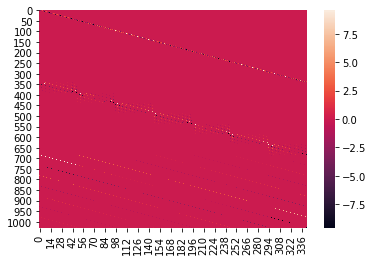

p6-gauss-legendre-lobatto-m460
ratio: 3.0
(array([-14.2015766 , -14.        ,  -5.66898523,  -4.        ,
        -3.89455263,  -3.45582821,  -3.2       ,  -2.26669809,
        -2.21580428,  -2.04996481,  -2.00696924,  -1.78762708,
        -1.67823848,  -1.59860669,  -1.40625   ,  -1.38846981,
        -1.31737344,  -1.0664419 ,  -0.9613398 ,  -0.90754447,
        -0.61639084,  -0.60224718,   0.        ,   0.60224718,
         0.61639084,   0.90754447,   0.9613398 ,   1.0664419 ,
         1.31737344,   1.38846981,   1.40625   ,   1.59860669,
         1.67823848,   1.78762708,   2.00696924,   2.04996481,
         2.21580428,   2.26669809,   3.2       ,   3.45582821,
         3.89455263,   4.        ,   5.66898523,  14.        ,
        14.2015766 ]), array([   147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147,    147,    147,
          147,    147,    147,    147,    147,    147, 346479,    147,
          147,    147,    14

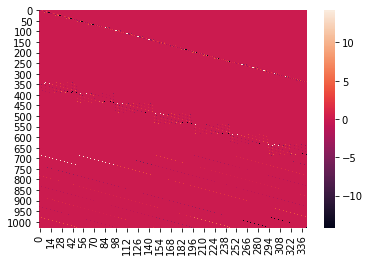

p5-gauss-legendre-m6
ratio: 3.0
(array([-9.13864199, -2.60688198, -1.31846908, -0.81046465, -0.53165311,
       -0.31935145,  0.        ,  0.31935145,  0.53165311,  0.81046465,
        1.31846908,  2.60688198,  9.13864199]), array([   108,    108,    108,    108,    108,    108, 138672,    108,
          108,    108,    108,    108,    108]))


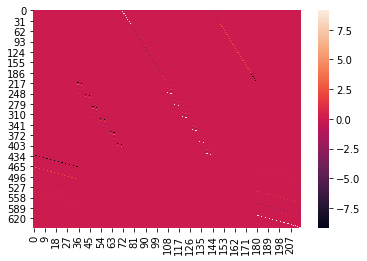

p5-gauss-legendre-m460
ratio: 3.0
(array([-7.14532713, -5.27576253, -2.68967445, -2.57598208, -2.3443613 ,
       -2.09538893, -2.08190754, -1.38899458, -1.2631629 , -1.17485228,
       -0.97773482, -0.89798768, -0.88602069, -0.75619011, -0.53621056,
       -0.52495233, -0.43845798, -0.25302628,  0.        ,  0.25302628,
        0.43845798,  0.52495233,  0.53621056,  0.75619011,  0.88602069,
        0.89798768,  0.97773482,  1.17485228,  1.2631629 ,  1.38899458,
        2.08190754,  2.09538893,  2.3443613 ,  2.57598208,  2.68967445,
        5.27576253,  7.14532713]), array([   108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108,    108, 136080,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108]))


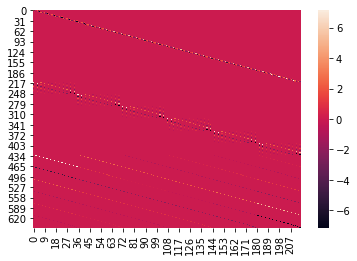

p5-gauss-legendre-lobatto-m6
ratio: 3.0
(array([-18.        ,  -3.        ,  -1.2590908 ,  -1.03988318,
         0.        ,   1.03988318,   1.2590908 ,   3.        ,
        18.        ]), array([   108,    108,    216,    216, 138672,    216,    216,    108,
          108]))


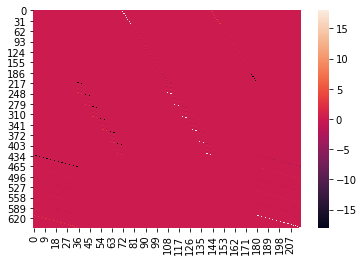

p5-gauss-legendre-lobatto-m460
ratio: 3.0
(array([-10.5       , -10.14141594,  -4.03618727,  -3.5       ,
        -3.04545575,  -2.52342678,  -2.24468465,  -1.75296197,
        -1.72125695,  -1.52483422,  -1.49687198,  -1.34991331,
        -1.30958379,  -1.15282816,  -0.78635667,  -0.65354751,
         0.        ,   0.65354751,   0.78635667,   1.15282816,
         1.30958379,   1.34991331,   1.49687198,   1.52483422,
         1.72125695,   1.75296197,   2.24468465,   2.52342678,
         3.04545575,   3.5       ,   4.03618727,  10.14141594,
        10.5       ]), array([   108,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
       136512,    108,    108,    108,    108,    108,    108,    108,
          108,    108,    108,    108,    108,    108,    108,    108,
          108]))


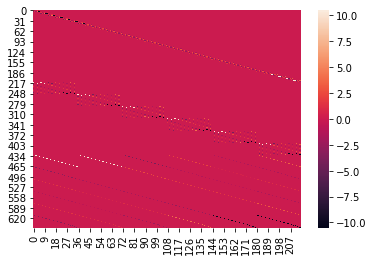

In [15]:
for name, data in matrices["hex"].items():
    dims = data.shape
    
    if dims[0]/dims[1] == 3.0:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

p1-gauss-legendre-m6
ratio: 1.0
(array([-1.3660254, -0.3660254,  0.       ,  0.3660254,  1.3660254]), array([ 12,  12, 528,  12,  12]))


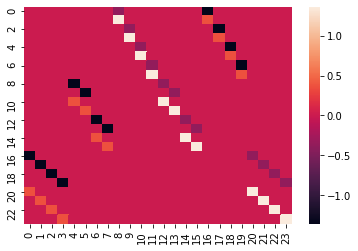

p3-gauss-legendre-m6
ratio: 2.0
(array([-4.38915297, -1.24762477, -0.6145281 , -0.32748486,  0.        ,
        0.32748486,  0.6145281 ,  1.24762477,  4.38915297]), array([   48,    48,    48,    48, 18048,    48,    48,    48,    48]))


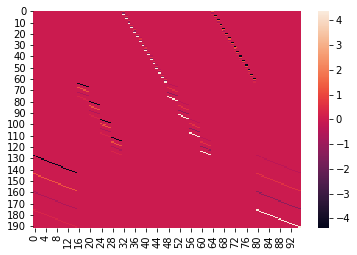

p3-gauss-legendre-m0
ratio: 1.5
(array([-0.81363245, -0.1139172 ,  0.        ,  0.40076152,  1.52678813]), array([  96,   96, 5760,   96,   96]))


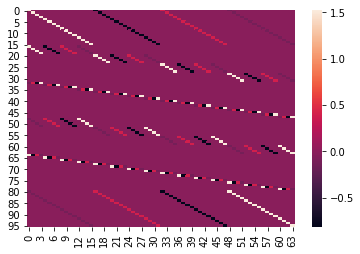

p3-gauss-legendre-m3
ratio: 0.6666666666666666
(array([-1.24762477, -0.32748486,  0.        ,  0.6145281 ,  4.38915297]), array([  96,   96, 5760,   96,   96]))


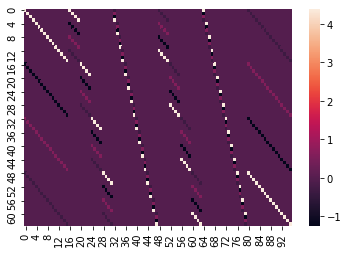

p3-gauss-legendre-lobatto-m6
ratio: 2.0
(array([-8.        , -2.        , -0.89442719,  0.        ,  0.89442719,
        2.        ,  8.        ]), array([   48,    48,    96, 18048,    96,    48,    48]))


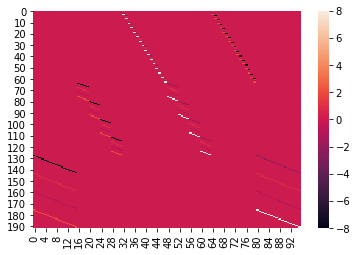

p3-gauss-legendre-lobatto-m0
ratio: 1.5
(array([0., 1.]), array([6048,   96]))


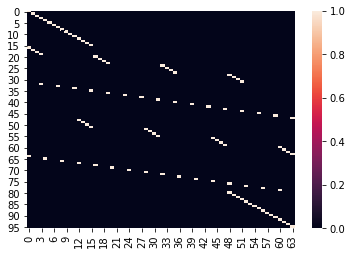

p3-gauss-legendre-lobatto-m3
ratio: 0.6666666666666666
(array([-2.        , -0.89442719,  0.        ,  0.89442719,  8.        ]), array([  96,   96, 5760,   96,   96]))


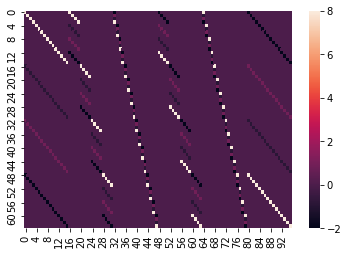

p2-gauss-legendre-m6
ratio: 1.5
(array([-2.661895, -0.75    , -0.338105,  0.      ,  0.338105,  0.75    ,
        2.661895]), array([  27,   27,   27, 4212,   27,   27,   27]))


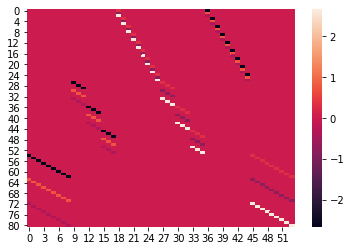

p2-gauss-legendre-m0
ratio: 2.0
(array([-0.66666667,  0.        ,  0.18783611,  1.47883056]), array([  54, 1296,   54,   54]))


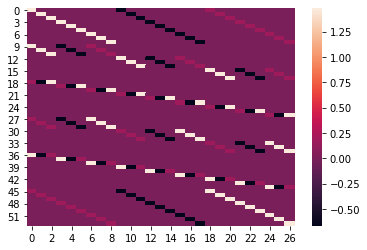

p2-gauss-legendre-m3
ratio: 0.5
(array([-0.75    ,  0.      ,  0.338105,  2.661895]), array([  54, 1296,   54,   54]))


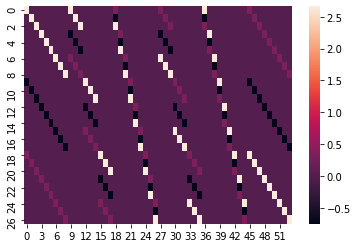

p2-gauss-legendre-lobatto-m6
ratio: 1.5
(array([-4.5 , -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  4.5 ]), array([  27,   27,   27, 4212,   27,   27,   27]))


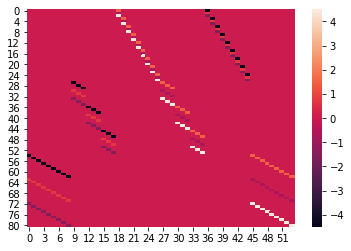

p2-gauss-legendre-lobatto-m0
ratio: 2.0
(array([0., 1.]), array([1404,   54]))


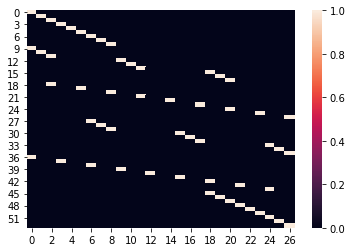

p2-gauss-legendre-lobatto-m3
ratio: 0.5
(array([-0.75,  0.  ,  1.5 ,  4.5 ]), array([  54, 1296,   54,   54]))


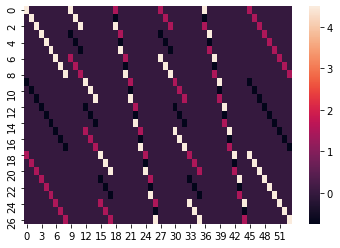

p4-gauss-legendre-m6
ratio: 2.5
(array([-6.54804561, -1.86607792, -0.9375    , -0.55981112, -0.32228787,
        0.        ,  0.32228787,  0.55981112,  0.9375    ,  1.86607792,
        6.54804561]), array([   75,    75,    75,    75,    75, 55500,    75,    75,    75,
          75,    75]))


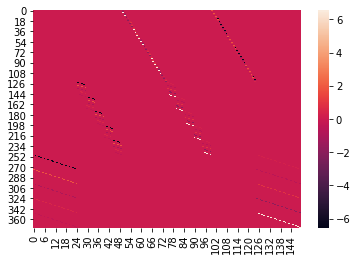

p4-gauss-legendre-m0
ratio: 1.2
(array([-0.89315839, -0.26794165,  0.        ,  0.07635866,  0.53333333,
        1.55140805]), array([  150,   150, 18000,   150,   150,   150]))


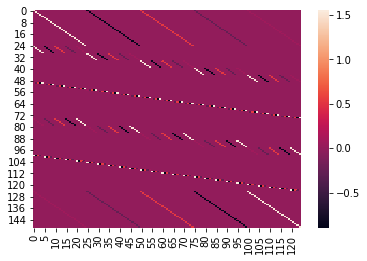

p4-gauss-legendre-m3
ratio: 0.8333333333333334
(array([-1.86607792, -0.55981112,  0.        ,  0.32228787,  0.9375    ,
        6.54804561]), array([  150,   150, 18000,   150,   150,   150]))


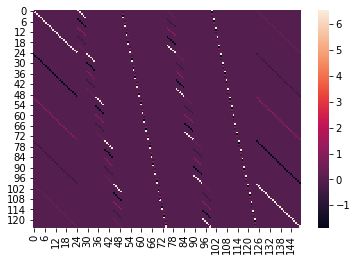

p4-gauss-legendre-lobatto-m6
ratio: 2.5
(array([-12.5       ,  -2.5       ,  -1.07142857,  -0.9375    ,
         0.        ,   0.9375    ,   1.07142857,   2.5       ,
        12.5       ]), array([   75,    75,   150,    75, 55500,    75,   150,    75,    75]))


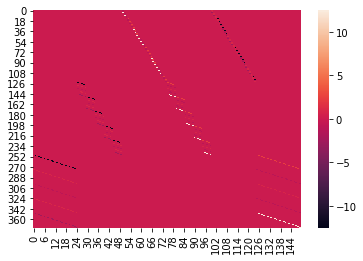

p4-gauss-legendre-lobatto-m0
ratio: 1.2
(array([0., 1.]), array([18600,   150]))


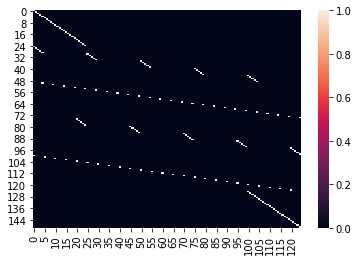

p4-gauss-legendre-lobatto-m3
ratio: 0.8333333333333334
(array([-1.07142857,  0.        ,  0.9375    ,  2.5       , 12.5       ]), array([  300, 18000,   150,   150,   150]))


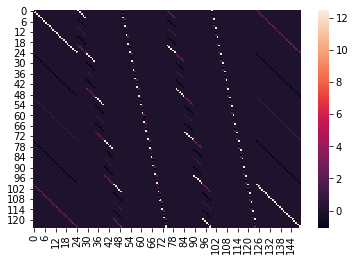

p6-gauss-legendre-m6
ratio: 3.5
(array([-12.16096777,  -3.47053266,  -1.76022778,  -1.09375   ,
        -0.74392821,  -0.51507804,  -0.31752836,   0.        ,
         0.31752836,   0.51507804,   0.74392821,   1.09375   ,
         1.76022778,   3.47053266,  12.16096777]), array([   147,    147,    147,    147,    147,    147,    147, 300468,
          147,    147,    147,    147,    147,    147,    147]))


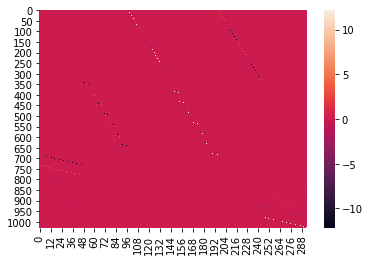

p6-gauss-legendre-m0
ratio: 0.8571428571428571
(array([-0.9707267 , -0.45714286, -0.1440701 ,  0.        ,  0.04111515,
        0.28405415,  0.67210786,  1.5746625 ]), array([  294,   294,   294, 98784,   294,   294,   294,   294]))


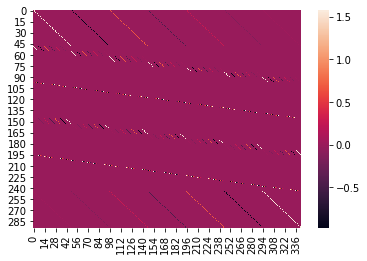

p6-gauss-legendre-m3
ratio: 1.1666666666666667
(array([-3.47053266, -1.09375   , -0.51507804,  0.        ,  0.31752836,
        0.74392821,  1.76022778, 12.16096777]), array([  294,   294,   294, 98784,   294,   294,   294,   294]))


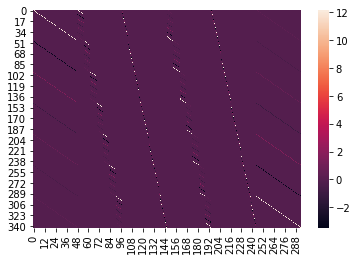

p6-gauss-legendre-lobatto-m6
ratio: 3.5
(array([-24.5       ,  -3.5       ,  -1.45162661,  -1.16237041,
        -1.09375   ,   0.        ,   1.09375   ,   1.16237041,
         1.45162661,   3.5       ,  24.5       ]), array([   147,    147,    294,    294,    147, 300468,    147,    294,
          294,    147,    147]))


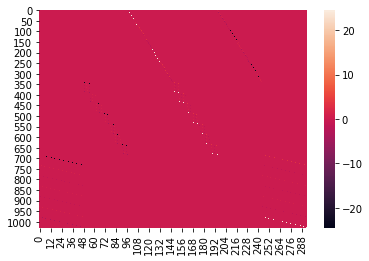

p6-gauss-legendre-lobatto-m0
ratio: 0.8571428571428571
(array([0., 1.]), array([100548,    294]))


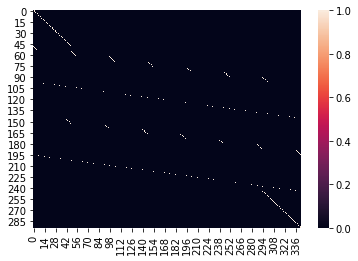

p6-gauss-legendre-lobatto-m3
ratio: 1.1666666666666667
(array([-1.45162661, -1.09375   ,  0.        ,  1.16237041,  3.5       ,
       24.5       ]), array([  588,   294, 98784,   588,   294,   294]))


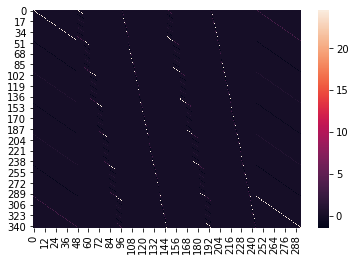

p5-gauss-legendre-m0
ratio: 1.0
(array([-0.94046284, -0.3792277 , -0.05471272,  0.        ,  0.19180001,
        0.61693006,  1.5656732 ]), array([  216,   216,   216, 45360,   216,   216,   216]))


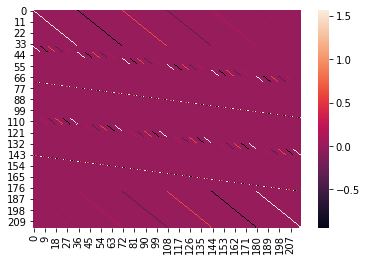

p5-gauss-legendre-m3
ratio: 1.0
(array([-2.60688198, -0.81046465, -0.31935145,  0.        ,  0.53165311,
        1.31846908,  9.13864199]), array([  216,   216,   216, 45360,   216,   216,   216]))


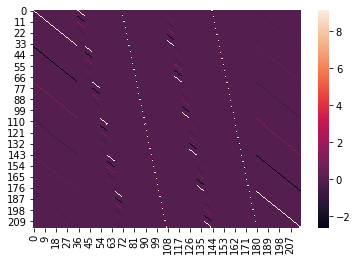

p5-gauss-legendre-lobatto-m0
ratio: 1.0
(array([0., 1.]), array([46440,   216]))


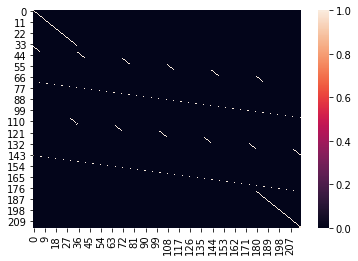

p5-gauss-legendre-lobatto-m3
ratio: 1.0
(array([-3.        , -1.2590908 , -1.03988318,  0.        ,  1.03988318,
        1.2590908 , 18.        ]), array([  216,   216,   216, 45360,   216,   216,   216]))


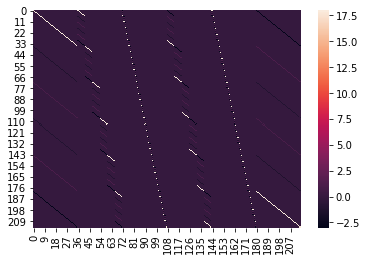

In [16]:
for name, data in matrices["hex"].items():
    dims = data.shape
    
    if dims[0]/dims[1] != 1/3.0 and dims[0]/dims[1] != 3.0:
        print(name)
        print("ratio: " + str(dims[0]/dims[1]))
        print(np.unique(data, return_counts=True))
        plt.figure()
        ax = sns.heatmap(data)
        plt.show()

### Thoughts
- m132 and m460 - quite sparse

- m0, m3, m6 - intersecting diags

## Tri

In [17]:
from collections import defaultdict
ratios_tri = defaultdict(int)
for name, data in matrices["tri"].items():
    dims = data.shape
    ratios_tri[dims[0]/dims[1]] += 1

In [18]:
ratios_tri

defaultdict(int,
            {0.5: 4,
             1.0: 3,
             2.0: 5,
             1.6666666666666667: 1,
             1.2: 1,
             0.8333333333333334: 1,
             1.3333333333333333: 1,
             1.5: 1,
             0.6666666666666666: 1,
             0.75: 1,
             0.8571428571428571: 1})

p1-williams-shunn-m132
ratio: 0.5
(array([-1.,  0.,  1.]), array([6, 6, 6]))


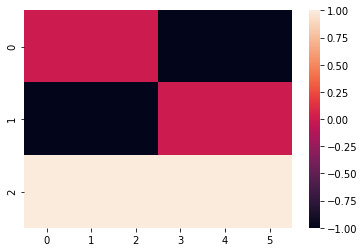

p1-williams-shunn-m6
ratio: 1.0
(array([-1.8660254, -0.5      , -0.1339746,  0.       ,  0.1339746,
        0.5      ,  1.8660254]), array([ 4,  4,  4, 12,  4,  4,  4]))


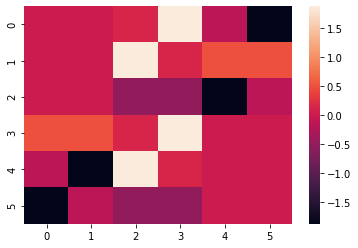

p1-williams-shunn-m0
ratio: 2.0
(array([-0.33333333,  0.0893164 ,  1.24401694]), array([6, 6, 6]))


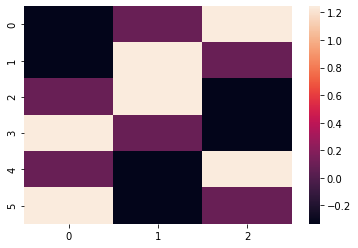

p1-williams-shunn-m3
ratio: 0.5
(array([-0.70710678, -0.5       ,  0.1339746 ,  0.18946869,  1.8660254 ,
        2.63895843]), array([2, 4, 4, 2, 4, 2]))


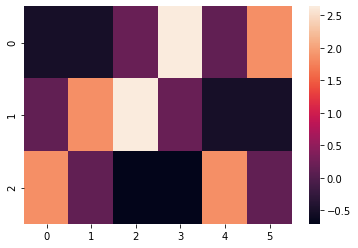

p1-williams-shunn-m460
ratio: 2.0
(array([-1.,  0.,  1.]), array([6, 6, 6]))


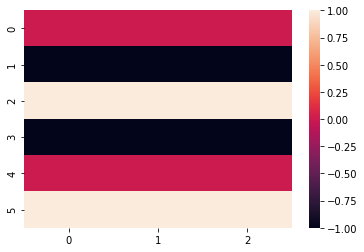

p3-williams-shunn-m132
ratio: 0.5
(array([-3.35205463, -2.68438394, -2.41092917, -2.13546192, -2.05926946,
       -2.05520728, -1.97089607, -1.92836375, -1.88014544, -1.83332026,
       -1.7966788 , -1.5477945 , -1.5418831 , -1.52860008, -1.52010698,
       -1.50282181, -1.46886676, -1.46850504, -1.44208707, -1.28830824,
       -0.97091421, -0.90886871, -0.82263206, -0.81333662, -0.62200876,
       -0.60184466, -0.57645687, -0.54483942, -0.27345477, -0.25948626,
       -0.24962445, -0.17506184, -0.16478474, -0.16456586, -0.14828215,
       -0.13090571, -0.11467199, -0.0955321 , -0.08483972, -0.07145144,
       -0.06009504, -0.04322055, -0.03664146, -0.03161745, -0.03017698,
       -0.02677969, -0.02177612, -0.0201641 ,  0.        ,  0.0201641 ,
        0.02177612,  0.02677969,  0.03017698,  0.03161745,  0.03664146,
        0.04322055,  0.06009504,  0.07145144,  0.08483972,  0.0955321 ,
        0.11467199,  0.13090571,  0.14828215,  0.16456586,  0.16478474,
        0.17506184,  0.249624

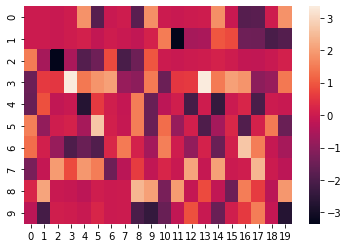

p3-williams-shunn-m6
ratio: 1.6666666666666667
(array([-5.35339889, -4.0659391 , -1.01654961, -0.98992608, -0.87995339,
       -0.87358235, -0.84130301, -0.50036306, -0.45597692, -0.37077408,
       -0.36566639, -0.35855909, -0.32426292, -0.24211985, -0.13739944,
       -0.08108871, -0.05630924, -0.05511438, -0.04597254, -0.02349354,
        0.        ,  0.02349354,  0.04597254,  0.05511438,  0.05630924,
        0.08108871,  0.13739944,  0.24211985,  0.32426292,  0.35855909,
        0.36566639,  0.37077408,  0.45597692,  0.50036306,  0.84130301,
        0.87358235,  0.87995339,  0.98992608,  1.01654961,  4.0659391 ,
        5.35339889]), array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4, 80,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4]))


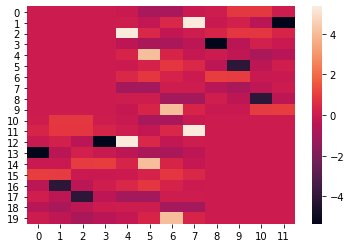

p3-williams-shunn-m0
ratio: 1.2
(array([-0.66889879, -0.60002949, -0.3142121 , -0.12080501, -0.08480139,
       -0.08035418, -0.03774133, -0.01360123, -0.00931764,  0.01069078,
        0.01909215,  0.02376128,  0.0478322 ,  0.14437936,  0.15168967,
        0.20558978,  0.30259288,  0.31395692,  1.30764361,  1.40253253]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]))


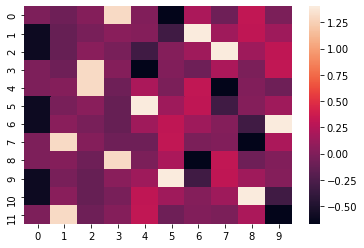

p3-williams-shunn-m3
ratio: 0.8333333333333334
(array([-1.43761825, -1.39996689, -1.24444201, -1.18978213, -1.01654961,
       -0.98992608, -0.87995339, -0.84130301, -0.50707913, -0.35855909,
       -0.34240918, -0.24211985, -0.19431216, -0.13739944, -0.06501499,
       -0.04597254, -0.03322488, -0.02349354,  0.05511438,  0.05630924,
        0.07794351,  0.07963329,  0.08108871,  0.11467676,  0.32426292,
        0.36566639,  0.37077408,  0.45597692,  0.45857702,  0.50036306,
        0.51713037,  0.52435374,  0.64484874,  0.70762023,  0.87358235,
        1.23543201,  4.0659391 ,  5.35339889,  5.75010622,  7.57084931]), array([2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2]))


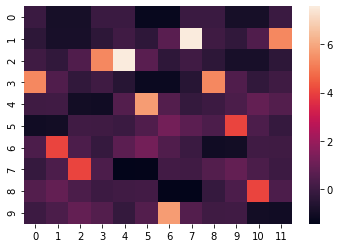

p3-williams-shunn-m460
ratio: 2.0
(array([-3.35205463, -2.68438394, -2.41092917, -2.13546192, -2.05926946,
       -2.05520728, -1.97089607, -1.92836375, -1.88014544, -1.83332026,
       -1.7966788 , -1.5477945 , -1.5418831 , -1.52860008, -1.52010698,
       -1.50282181, -1.46886676, -1.46850504, -1.44208707, -1.28830824,
       -0.97091421, -0.90886871, -0.82263206, -0.81333662, -0.62200876,
       -0.60184466, -0.57645687, -0.54483942, -0.27345477, -0.25948626,
       -0.24962445, -0.17506184, -0.16478474, -0.16456586, -0.14828215,
       -0.13090571, -0.11467199, -0.0955321 , -0.08483972, -0.07145144,
       -0.06009504, -0.04322055, -0.03664146, -0.03161745, -0.03017698,
       -0.02677969, -0.02177612, -0.0201641 ,  0.        ,  0.0201641 ,
        0.02177612,  0.02677969,  0.03017698,  0.03161745,  0.03664146,
        0.04322055,  0.06009504,  0.07145144,  0.08483972,  0.0955321 ,
        0.11467199,  0.13090571,  0.14828215,  0.16456586,  0.16478474,
        0.17506184,  0.249624

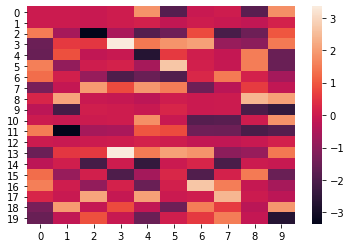

p2-williams-shunn-m132
ratio: 0.5
(array([-2.04015464, -1.54015464, -1.49089629, -1.42729767, -1.41977847,
       -1.3507575 , -1.33528231, -1.27832187, -0.72154845, -0.66136036,
       -0.06902097, -0.06359862, -0.06018808, -0.05696044,  0.        ,
        0.05696044,  0.06018808,  0.06359862,  0.06902097,  0.66136036,
        0.72154845,  1.27832187,  1.33528231,  1.3507575 ,  1.41977847,
        1.42729767,  1.49089629,  1.54015464,  2.04015464]), array([2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 8, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2]))


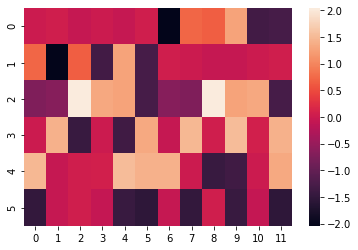

p2-williams-shunn-m6
ratio: 1.3333333333333333
(array([-3.29848568, -2.7069103 , -0.73116613, -0.72780648, -0.68678848,
       -0.39198253, -0.30276343, -0.20029351, -0.09694943, -0.00560158,
        0.        ,  0.00560158,  0.09694943,  0.20029351,  0.30276343,
        0.39198253,  0.68678848,  0.72780648,  0.73116613,  2.7069103 ,
        3.29848568]), array([ 4,  2,  4,  2,  4,  4,  4,  4,  4,  4, 36,  4,  4,  4,  4,  4,  4,
        2,  4,  2,  4]))


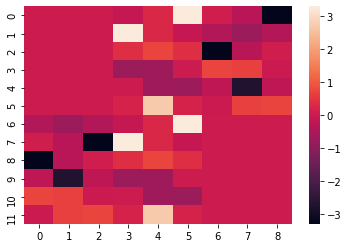

p2-williams-shunn-m0
ratio: 1.5
(array([-0.58798459, -0.34518578, -0.03837513,  0.00450465,  0.07490108,
        0.15515698,  0.16107078,  0.18005308,  1.30562731,  1.36051633]), array([6, 6, 6, 6, 6, 6, 6, 3, 6, 3]))


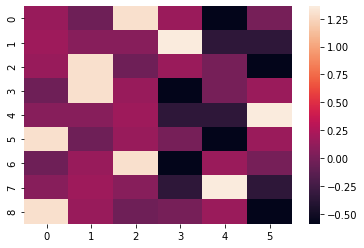

p2-williams-shunn-m3
ratio: 0.6666666666666666
(array([-1.03402506, -0.97126559, -0.73116613, -0.68678848, -0.13710719,
       -0.09694943,  0.00560158,  0.00792184,  0.20029351,  0.2832578 ,
        0.30276343,  0.39198253,  0.42817214,  0.55434701,  0.72780648,
        1.02927379,  2.7069103 ,  3.29848568,  3.82814926,  4.66476318]), array([2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 1, 2, 4, 1, 2]))


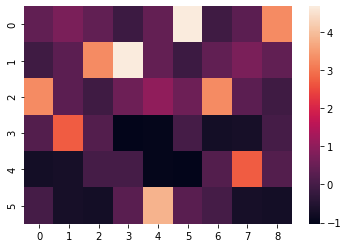

p2-williams-shunn-m460
ratio: 2.0
(array([-2.04015464, -1.54015464, -1.49089629, -1.42729767, -1.41977847,
       -1.3507575 , -1.33528231, -1.27832187, -0.72154845, -0.66136036,
       -0.06902097, -0.06359862, -0.06018808, -0.05696044,  0.        ,
        0.05696044,  0.06018808,  0.06359862,  0.06902097,  0.66136036,
        0.72154845,  1.27832187,  1.33528231,  1.3507575 ,  1.41977847,
        1.42729767,  1.49089629,  1.54015464,  2.04015464]), array([2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 8, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2]))


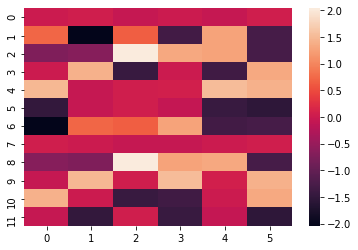

p4-williams-shunn-m6
ratio: 2.0
(array([-8.17798628, -5.9351833 , -5.45445852, -1.42627153, -1.33618961,
       -1.20584154, -1.17290095, -1.12531082, -1.0722364 , -0.97941096,
       -0.97589301, -0.92491869, -0.75403024, -0.69823501, -0.61438083,
       -0.58563893, -0.57871403, -0.43793491, -0.40508372, -0.40443234,
       -0.37668499, -0.37325346, -0.31585491, -0.298143  , -0.23564033,
       -0.21116871, -0.15204942, -0.14147099, -0.10925634, -0.10651087,
       -0.10547656, -0.09218614, -0.07404784, -0.05850348, -0.04441552,
       -0.03493992, -0.03407069, -0.03078013, -0.01797338,  0.        ,
        0.01797338,  0.03078013,  0.03407069,  0.03493992,  0.04441552,
        0.05850348,  0.07404784,  0.09218614,  0.10547656,  0.10651087,
        0.10925634,  0.14147099,  0.15204942,  0.21116871,  0.23564033,
        0.298143  ,  0.31585491,  0.37325346,  0.37668499,  0.40443234,
        0.40508372,  0.43793491,  0.57871403,  0.58563893,  0.61438083,
        0.69823501,  0.75403024

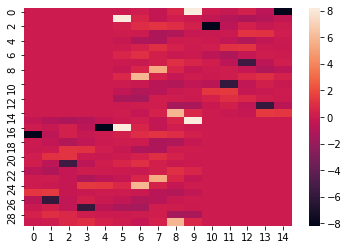

p4-williams-shunn-m0
ratio: 1.0
(array([-0.69744491, -0.67233012, -0.56475005, -0.27169671, -0.23898215,
       -0.19251477, -0.18053925, -0.10748769, -0.08515381, -0.06972436,
       -0.03258816, -0.02742354, -0.02715144, -0.01242883, -0.0113506 ,
       -0.00599464, -0.00303887,  0.00931605,  0.0110788 ,  0.01539912,
        0.01661907,  0.02039085,  0.02066118,  0.04349218,  0.04705261,
        0.0508158 ,  0.08730963,  0.10336184,  0.10678938,  0.10969481,
        0.21702186,  0.25146279,  0.30569695,  0.3130712 ,  0.36215781,
        0.51339976,  1.27736279,  1.40533041,  1.44641914]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 3, 6, 6, 3]))


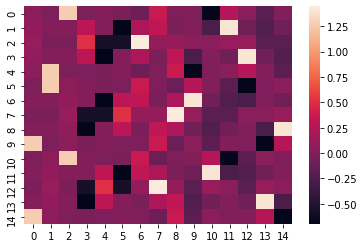

p4-williams-shunn-m3
ratio: 1.0
(array([-2.01705254, -1.88965747, -1.65873243, -1.59142983, -1.42627153,
       -1.38509626, -1.33618961, -1.17290095, -1.12531082, -1.06635978,
       -0.97941096, -0.75403024, -0.61933349, -0.52786011, -0.43793491,
       -0.42163788, -0.37325346, -0.29863765, -0.298143  , -0.21503036,
       -0.21116871, -0.1545118 , -0.15204942, -0.14916638, -0.10925634,
       -0.10547656, -0.08273641, -0.06281303, -0.05850348, -0.04818323,
       -0.04441552, -0.03407069,  0.01797338,  0.0254182 ,  0.03078013,
        0.03493992,  0.04352968,  0.04941252,  0.07404784,  0.09218614,
        0.10471945,  0.10651087,  0.13037089,  0.14147099,  0.15062912,
        0.2000702 ,  0.23564033,  0.31585491,  0.33324575,  0.37668499,
        0.40443234,  0.40508372,  0.4466863 ,  0.53271302,  0.5719537 ,
        0.57287489,  0.57871403,  0.58563893,  0.61438083,  0.69823501,
        0.81842523,  0.82821852,  0.8688657 ,  0.92491869,  0.97589301,
        0.98745343,  1.0722364 

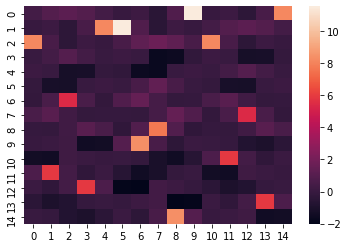

p6-williams-shunn-m0
ratio: 0.75
(array([-7.41044169e-01, -7.38289664e-01, -7.25767872e-01, -6.38646802e-01,
       -4.77147528e-01, -4.53632738e-01, -4.12587193e-01, -2.54117997e-01,
       -2.48291504e-01, -2.19806321e-01, -2.15611594e-01, -1.95383585e-01,
       -1.88070629e-01, -1.54365873e-01, -1.43013072e-01, -1.21108481e-01,
       -1.18476245e-01, -1.07956755e-01, -1.05794734e-01, -1.02247568e-01,
       -8.75907367e-02, -6.25762860e-02, -5.34367241e-02, -5.01200807e-02,
       -4.03670126e-02, -3.25100222e-02, -3.22270469e-02, -2.90870970e-02,
       -2.65501477e-02, -2.58193683e-02, -2.40714060e-02, -1.56172771e-02,
       -1.48667876e-02, -1.46989743e-02, -1.27664863e-02, -1.24519034e-02,
       -1.17185130e-02, -6.96412768e-03, -5.33272229e-03, -4.64683053e-03,
       -4.30138531e-03, -4.29596094e-03, -3.11016731e-03, -2.40244872e-03,
       -1.26653376e-03, -1.20221015e-03, -8.75968607e-04, -6.74831817e-04,
        2.12902983e-04,  1.68997918e-03,  1.79788484e-03,  3.05187

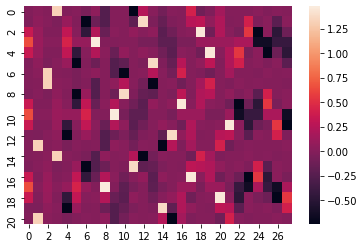

p5-williams-shunn-m0
ratio: 0.8571428571428571
(array([-7.65894028e-01, -7.38708994e-01, -6.80742415e-01, -5.13852470e-01,
       -4.05548339e-01, -2.81129273e-01, -2.60198092e-01, -2.33940466e-01,
       -1.88528665e-01, -1.72622727e-01, -1.01293177e-01, -9.76972473e-02,
       -8.69088221e-02, -7.26334079e-02, -7.04942428e-02, -4.15974137e-02,
       -4.03378214e-02, -3.34896744e-02, -3.19680928e-02, -3.12297537e-02,
       -2.66915981e-02, -2.05291746e-02, -1.18605072e-02, -9.94564171e-03,
       -9.30556437e-03, -7.10427213e-03, -4.92625080e-03, -4.50387726e-03,
       -6.87330481e-04,  3.63601285e-05,  2.04972514e-04,  1.06482964e-03,
        1.55018104e-03,  2.76614589e-03,  4.82550105e-03,  5.70951546e-03,
        1.51472297e-02,  1.55191163e-02,  1.64842028e-02,  1.90214540e-02,
        2.18085144e-02,  4.34052853e-02,  4.34558224e-02,  4.34919937e-02,
        5.02467102e-02,  5.87467865e-02,  6.59949605e-02,  6.96494762e-02,
        1.36054272e-01,  1.42309879e-01,  1.66429628

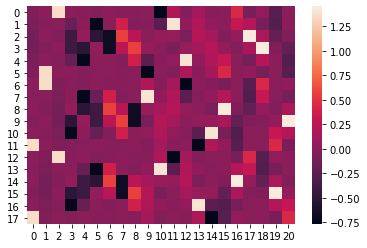

In [19]:
for name, data in matrices["tri"].items():
    dims = data.shape
    
    print(name)
    print("ratio: " + str(dims[0]/dims[1]))
    print(np.unique(data, return_counts=True))
    plt.figure()
    ax = sns.heatmap(data)
    plt.show()

### Thoughts
- no dominant dimension ratio

- can get corners of zeros

- repeat many constants for same amount

- seemingly random placement

- although can get clusters of a constant

- prob best to randomly place

## Tet

In [20]:
from collections import defaultdict
ratios_tet = defaultdict(int)
for name, data in matrices["tet"].items():
    dims = data.shape
    ratios_tet[dims[0]/dims[1]] += 1

In [21]:
ratios_tet

defaultdict(int,
            {0.3333333333333333: 3,
             1.0: 1,
             3.0: 3,
             1.5: 1,
             2.0: 1,
             0.5: 1,
             1.25: 1,
             2.4: 1,
             0.4166666666666667: 1,
             1.7142857142857142: 1})

p1-shunn-ham-m132
ratio: 0.3333333333333333
(array([-1.11803399,  0.        ,  1.11803399]), array([12, 24, 12]))


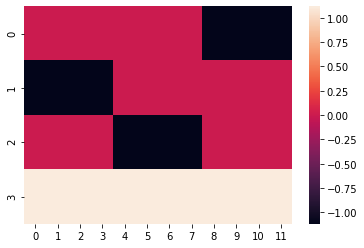

p1-shunn-ham-m6
ratio: 1.0
(array([-2.36338998, -0.61803399, -0.127322  ,  0.        ,  0.127322  ,
        0.61803399,  2.36338998]), array([ 9,  9, 18, 72, 18,  9,  9]))


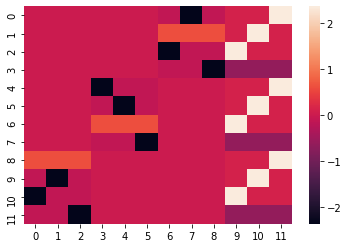

p1-shunn-ham-m0
ratio: 3.0
(array([-0.30901699,  0.063661  ,  1.18169499]), array([12, 24, 12]))


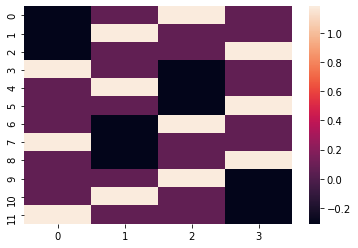

p1-shunn-ham-m3
ratio: 0.3333333333333333
(array([-1.07046627, -0.61803399,  0.127322  ,  0.22052818,  2.36338998,
        4.09351153]), array([ 3,  9, 18,  6,  9,  3]))


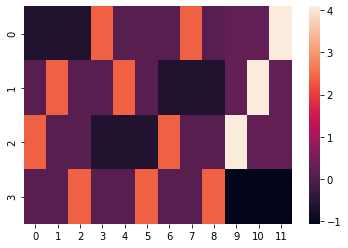

p1-shunn-ham-m460
ratio: 3.0
(array([-1.11803399,  0.        ,  1.11803399]), array([12, 24, 12]))


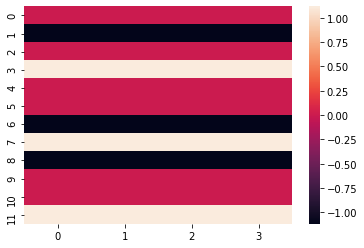

p3-shunn-ham-m6
ratio: 1.5
(array([-7.67317874e+00, -4.82515868e+00, -4.19680096e+00, -2.76502047e+00,
       -1.49774568e+00, -1.21666464e+00, -9.25672626e-01, -9.02137346e-01,
       -8.37457798e-01, -7.03186498e-01, -6.90537714e-01, -6.56770646e-01,
       -5.47548032e-01, -5.30818522e-01, -4.75237563e-01, -3.65181021e-01,
       -3.24471383e-01, -3.24149807e-01, -2.61656644e-01, -2.46983272e-01,
       -1.79436063e-01, -1.59906209e-01, -1.43650268e-01, -1.35681212e-01,
       -1.31709608e-01, -1.26877479e-01, -1.15273131e-01, -9.17257660e-02,
       -8.72615087e-02, -7.93524066e-02, -7.75993461e-02, -7.60145555e-02,
       -6.31507997e-02, -6.28622859e-02, -3.79836236e-02, -3.32984468e-02,
       -1.76756946e-02, -9.49759940e-03, -3.05169500e-03, -1.22538693e-03,
        0.00000000e+00,  1.22538693e-03,  3.05169500e-03,  9.49759940e-03,
        1.76756946e-02,  3.32984468e-02,  3.79836236e-02,  6.28622859e-02,
        6.31507997e-02,  7.60145555e-02,  7.75993461e-02,  7.93524066e-0

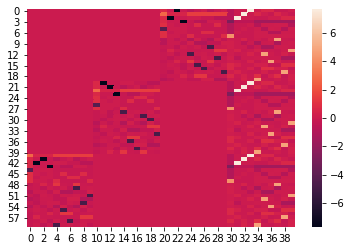

p3-shunn-ham-m0
ratio: 2.0
(array([-0.52600721, -0.43125275, -0.31416444, -0.26943946, -0.09618673,
       -0.0935334 , -0.0761862 , -0.04076538, -0.039667  , -0.03767137,
       -0.02680521, -0.02426688, -0.02017264, -0.01957271, -0.01906866,
       -0.01728259, -0.01474506, -0.00304354,  0.0047247 ,  0.00981748,
        0.01019143,  0.01093024,  0.0121453 ,  0.01234691,  0.01448161,
        0.01571394,  0.01697567,  0.02603404,  0.04759603,  0.04968805,
        0.10752904,  0.10760102,  0.12988772,  0.13863615,  0.19247882,
        0.23801822,  0.28560425,  0.91241758,  1.29776873,  1.35246873]), array([24, 12, 12, 24,  4, 24, 24, 12, 24, 12, 24, 24, 24, 12, 24, 24, 24,
       24, 12, 24, 24, 24, 24, 24, 12, 24, 24, 24, 24, 24, 24, 24, 24, 12,
       12, 24, 24, 12, 24,  4]))


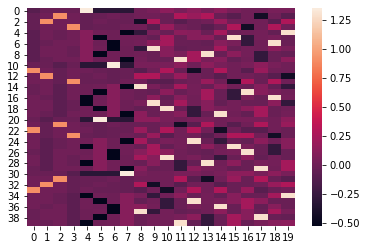

p3-shunn-ham-m3
ratio: 0.5
(array([-4.78915594e+00, -2.76502047e+00, -2.59417161e+00, -2.10732496e+00,
       -1.56254772e+00, -1.49774568e+00, -1.45051946e+00, -1.21666464e+00,
       -1.19604641e+00, -9.48381011e-01, -9.19404649e-01, -9.02137346e-01,
       -8.37457798e-01, -6.90537714e-01, -5.47548032e-01, -5.30818522e-01,
       -4.53202601e-01, -2.76965679e-01, -2.61656644e-01, -2.48809562e-01,
       -1.99658919e-01, -1.59906209e-01, -1.58873687e-01, -1.43650268e-01,
       -1.34406010e-01, -1.31661072e-01, -1.15273131e-01, -9.17257660e-02,
       -7.75993461e-02, -7.60145555e-02, -5.76746017e-02, -3.32984468e-02,
       -5.28569078e-03, -3.05169500e-03,  1.22538693e-03,  2.12243243e-03,
        9.49759940e-03,  1.64503247e-02,  1.76756946e-02,  3.06152011e-02,
        3.79836236e-02,  6.28622859e-02,  6.31507997e-02,  6.57895660e-02,
        7.93524066e-02,  8.72615087e-02,  1.08880673e-01,  1.09380394e-01,
        1.26877479e-01,  1.31709608e-01,  1.35681212e-01,  1.37442400e-0

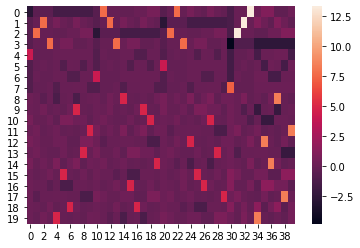

p2-shunn-ham-m132
ratio: 0.3333333333333333
(array([-2.04495479, -1.76141856, -1.7500337 , -1.71337861, -1.71315436,
       -1.66511441, -1.55992148, -1.4821005 , -1.46108807, -1.24271838,
       -1.16327656, -0.68315281, -0.64472623, -0.1690998 , -0.13387893,
       -0.09883341, -0.07944183, -0.07782098, -0.07192009, -0.06195884,
       -0.0482642 , -0.03842658, -0.02101243,  0.        ,  0.02101243,
        0.03842658,  0.0482642 ,  0.06195884,  0.07192009,  0.07782098,
        0.07944183,  0.09883341,  0.13387893,  0.1690998 ,  0.64472623,
        0.68315281,  1.16327656,  1.24271838,  1.46108807,  1.4821005 ,
        1.55992148,  1.66511441,  1.71315436,  1.71337861,  1.7500337 ,
        1.76141856,  2.04495479]), array([ 3,  3,  6,  3,  6,  6,  6,  6,  6,  6,  3,  6,  3,  6,  6,  6,  6,
        6,  6,  3, 12,  6,  6, 48,  6,  6, 12,  3,  6,  6,  6,  6,  6,  6,
        3,  6,  3,  6,  6,  6,  6,  6,  6,  3,  6,  3,  3]))


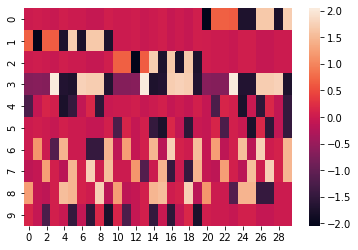

p2-shunn-ham-m6
ratio: 1.25
(array([-4.00272788, -3.27178567, -0.99206734, -0.81465504, -0.6394707 ,
       -0.43646441, -0.37957603, -0.1891731 , -0.16506007, -0.12998823,
       -0.07558059, -0.06659091, -0.05881613, -0.01105329,  0.        ,
        0.01105329,  0.05881613,  0.06659091,  0.07558059,  0.12998823,
        0.16506007,  0.1891731 ,  0.37957603,  0.43646441,  0.6394707 ,
        0.81465504,  0.99206734,  3.27178567,  4.00272788]), array([  9,   9,   9,  18,   9,   9,  18,  18,   9,   9,  18,  18,   9,
        18, 360,  18,   9,  18,  18,   9,   9,  18,  18,   9,   9,  18,
         9,   9,   9]))


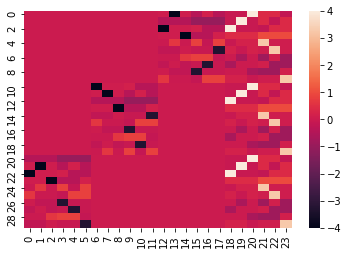

p2-shunn-ham-m0
ratio: 2.4
(array([-0.51465891, -0.31063802, -0.02988924, -0.02322603, -0.01351974,
        0.00316332,  0.0101803 ,  0.05032626,  0.05472887,  0.12075897,
        0.14180657,  0.14741365,  1.16322444,  1.28381482]), array([12, 24, 24, 12, 12, 12, 24, 24, 24, 12, 24, 12, 12, 12]))


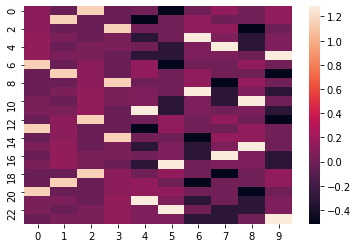

p2-shunn-ham-m3
ratio: 0.4166666666666667
(array([-1.41102391, -1.10759575, -0.81465504, -0.6394707 , -0.28589244,
       -0.16506007, -0.11533884, -0.10187253, -0.06659091, -0.05881613,
        0.01105329,  0.01914486,  0.07558059,  0.12998823,  0.13090943,
        0.1891731 ,  0.22514622,  0.32765742,  0.37957603,  0.43646441,
        0.65744496,  0.75597853,  0.99206734,  1.71831104,  3.27178567,
        4.00272788,  5.66689902,  6.93292806]), array([ 6,  3, 18,  9,  3,  9,  6,  3, 18,  9, 18,  6, 18,  9,  6, 18,  3,
        6, 18,  9,  6,  3,  9,  3,  9,  9,  3,  3]))


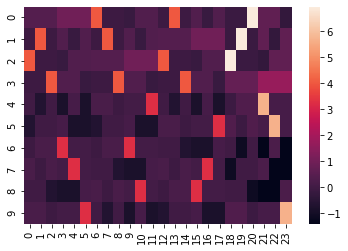

p2-shunn-ham-m460
ratio: 3.0
(array([-2.04495479, -1.76141856, -1.7500337 , -1.71337861, -1.71315436,
       -1.66511441, -1.55992148, -1.4821005 , -1.46108807, -1.24271838,
       -1.16327656, -0.68315281, -0.64472623, -0.1690998 , -0.13387893,
       -0.09883341, -0.07944183, -0.07782098, -0.07192009, -0.06195884,
       -0.0482642 , -0.03842658, -0.02101243,  0.        ,  0.02101243,
        0.03842658,  0.0482642 ,  0.06195884,  0.07192009,  0.07782098,
        0.07944183,  0.09883341,  0.13387893,  0.1690998 ,  0.64472623,
        0.68315281,  1.16327656,  1.24271838,  1.46108807,  1.4821005 ,
        1.55992148,  1.66511441,  1.71315436,  1.71337861,  1.7500337 ,
        1.76141856,  2.04495479]), array([ 3,  3,  6,  3,  6,  6,  6,  6,  6,  6,  3,  6,  3,  6,  6,  6,  6,
        6,  6,  3, 12,  6,  6, 48,  6,  6, 12,  3,  6,  6,  6,  6,  6,  6,
        3,  6,  3,  6,  6,  6,  6,  6,  6,  3,  6,  3,  3]))


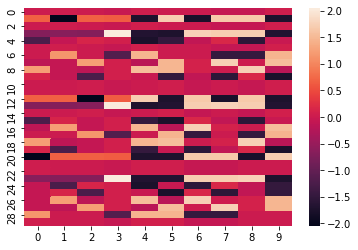

p4-shunn-ham-m0
ratio: 1.7142857142857142
(array([-5.74613811e-01, -5.39665641e-01, -5.13991877e-01, -5.03391360e-01,
       -2.91709818e-01, -2.33444109e-01, -1.94001487e-01, -1.78130052e-01,
       -1.54416777e-01, -1.14172569e-01, -8.53187241e-02, -7.16810200e-02,
       -6.99274278e-02, -6.38926333e-02, -4.77953190e-02, -4.65333649e-02,
       -4.50496821e-02, -4.09847594e-02, -2.59106780e-02, -2.46085920e-02,
       -2.36983984e-02, -2.34238007e-02, -1.91048007e-02, -1.85252382e-02,
       -1.64897402e-02, -1.58056742e-02, -1.54453899e-02, -1.42159222e-02,
       -1.32598758e-02, -1.31347801e-02, -1.26644723e-02, -1.26083153e-02,
       -1.21768716e-02, -1.17624156e-02, -1.10291555e-02, -1.09631800e-02,
       -1.00506445e-02, -8.97098501e-03, -7.40196254e-03, -5.38730036e-03,
       -5.26203469e-03, -4.69546640e-03, -2.55523286e-03, -1.28621116e-03,
       -9.81029397e-04, -5.83003419e-04, -5.12047775e-04,  3.48511664e-04,
        8.69537319e-04,  1.03790198e-03,  3.10006563e-03,

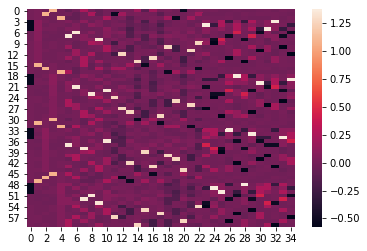

In [22]:
for name, data in matrices["tet"].items():
    dims = data.shape
    
    print(name)
    print("ratio: " + str(dims[0]/dims[1]))
    print(np.unique(data, return_counts=True))
    plt.figure()
    ax = sns.heatmap(data)
    plt.show()

### Thoughts
- m* has its own pattern style